# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [342]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [343]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [344]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [345]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [346]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [347]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [348]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [349]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [350]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [351]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [352]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [353]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

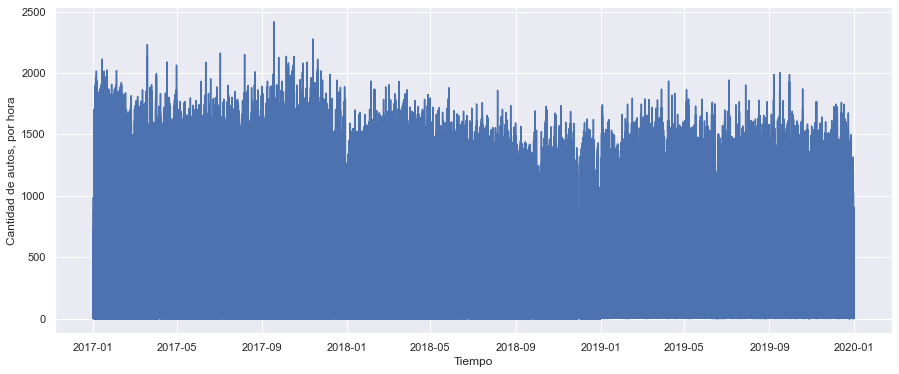

In [354]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [355]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

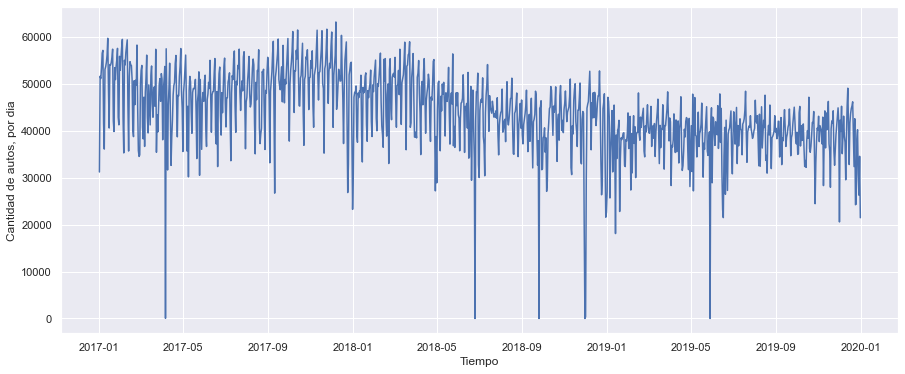

In [356]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

# Prueba Dickey Fuller

In [357]:
from statsmodels.tsa.stattools import adfuller

xx = dataset.cantidad_pasos
result = adfuller(xx)
print("Adf: ", result[0])
print('p-value: ', result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Adf:  -23.919480679602945
p-value:  0.0
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567


La prueba de Dickey Fuller, me sirve como informe sobre la serie que estoy tratando, en este caso quiero ver si mi serie, es estacionaria o no. 
El primer resultado, es -23.919, el cual nos dice que mi series es estacionaria y no posee una estructura que dependa del tiempo.


## Análisis exploratorio.

In [358]:
dataset.describe(include='all')

dia sentido tipo_vehiculo  cantidad_pasos                fecha
count    238869  238869        238869   238869.000000               238869
unique        7       2             2             NaN                26102
top     Viernes  Centro        Pesado             NaN  2018-09-20 15:00:00
freq      35196  127696        151521             NaN                   19
first       NaN     NaN           NaN             NaN  2017-01-01 00:00:00
last        NaN     NaN           NaN             NaN  2019-12-31 23:00:00
mean        NaN     NaN           NaN      200.384232                  NaN
std         NaN     NaN           NaN      403.246904                  NaN
min         NaN     NaN           NaN        1.000000                  NaN
25%         NaN     NaN           NaN        2.000000                  NaN
50%         NaN     NaN           NaN       11.000000                  NaN
75%         NaN     NaN           NaN      104.000000                  NaN
max         NaN     NaN           NaN     2416.000000                  NaN

In [359]:
dataset.isnull().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

In [360]:
diario_falta = diario.copy()
diario_falta.describe()

cantidad_pasos
count     1095.000000
mean     43712.859361
std       8192.736927
min          0.000000
25%      39061.500000
50%      43761.000000
75%      49498.000000
max      63127.000000

Vamos a realizar un corte en los puntos donde haya menos de 15000 pases en el dia.

In [361]:
diario_falta= diario[diario.cantidad_pasos <= 15000]
diario_falta

cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0

Viendo esto llego a la hipótesis que en los datos atípicos que presenta el set de datos se pueden encontrar en que estos dias no hubo pagos en efectivo, o bien estuvieron por debajo de los 15000.

Para conocer un poco más sobre esta situación vamos a analizar estos datos.

In [362]:
falta_17 = data_2017[(data_2017.estacion== 'Illia') & (data_2017.fecha== '2017-04-06')]
falta_17= falta_17.loc[:,['forma_pago', 'cantidad_pasos']]
falta_17.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

cantidad_pasos
forma_pago                
NO COBRADO           45961
TELEPASE             19296
EFECTIVO                40
EXENTO                   1

Analizando este dato, podemos ver que no se cobraron mas de 45 mil peajes, en efectivo solamente fueron 40 los peajes cobrados y casi 20 mil fueron por telepase.
Los no cobrado se pudieron dar por una protesta, paro de personal, levatamiento ante embotellamiento o demoras, etc.

In [363]:
falta_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-06-25')]
falta_18= falta_18.loc[:,['forma_pago', 'cantidad_pasos']]
falta_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

cantidad_pasos
forma_pago                
NO COBRADO           85099

Aquí vemos que no hubo pago de ningún tipo. Lo que nos da la hipótesis que este día hubo un paro del personal de peajes y "se pierden" 85 mil datos de los que utilizamos para este proyecto.

In [364]:
falta_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-09-25')]
falta_18= falta_18.loc[:,['forma_pago', 'cantidad_pasos']]
falta_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

cantidad_pasos
forma_pago                
NO COBRADO           78690

El resultado es el mismo que el paso anterior, deducimos que fue un paro nacional nuevamente.

In [365]:
falta_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-11-30')]
falta_18= falta_18.loc[:,['forma_pago', 'cantidad_pasos']]
falta_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

cantidad_pasos
forma_pago                
NO COBRADO             387

Aquí no encontramos datos con pago en efectivo.

In [366]:
falta_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-12-01')]
falta_18= falta_18.loc[:,['forma_pago', 'cantidad_pasos']]
falta_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

cantidad_pasos
forma_pago                          
NO COBRADO                       464
EFECTIVO                         350
TELEPASE                         290
EXENTO                             9
INFRACCION                         5
TARJETA DISCAPACIDAD               3

Aquí vemos que los pejaes disminuyeron durante este dia y solamente 350 fueron abonados en efectivo.

In [367]:
falta_19 = data_2019[(data_2019.estacion== 'Illia') & (data_2019.fecha== '2019-05-29')]
falta_19= falta_19.loc[:,['forma_pago', 'cantidad_pasos']]
falta_19.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

cantidad_pasos
forma_pago                
NO COBRADO           87419

Volvemos a ver que no hay registros de pagos este día. Lo cual nos dice que también este día hubo paro nacional del personal o alguna protesta.

A continuación se pasan a NaN estos datos estudiados para posteriormente normalizar los datos.

In [369]:
diario.isnull().sum()

cantidad_pasos    6
dtype: int64

A continuación realizaré una interpolación con el metodo nearest, que es similar a un vecino más cercano, utilizaré un K de 2.

In [370]:
diario= diario.interpolate(method='nearest', k=2)
diario.isnull().sum()

cantidad_pasos    0
dtype: int64

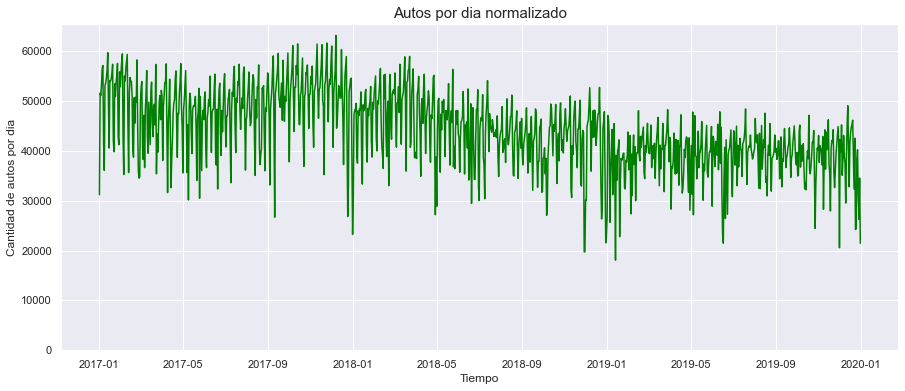

In [371]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, color='green')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por dia')
plt.title('Autos por dia normalizado', size= 15)
plt.ylim(ymin=0)
plt.show()

Ahora vamos a ver los dias y horarios con mayor frecuencia de pasos.

In [372]:
mask_d = dataset[dataset.cantidad_pasos>= (dataset.cantidad_pasos.mean()+ dataset.cantidad_pasos.std())]
mask_d

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
11      Domingo     Centro       Liviano             857 2017-01-01 00:00:00
16      Domingo     Centro       Liviano             783 2017-01-01 02:00:00
19      Domingo  Provincia       Liviano             704 2017-01-01 03:00:00
22      Domingo     Centro       Liviano             988 2017-01-01 03:00:00
...         ...        ...           ...             ...                 ...
238850   Martes  Provincia       Liviano             643 2019-12-31 18:00:00
238854   Martes  Provincia       Liviano             640 2019-12-31 19:00:00
238858   Martes  Provincia       Liviano             773 2019-12-31 20:00:00
238861   Martes  Provincia       Liviano             905 2019-12-31 21:00:00
238862   Martes     Centro       Liviano             799 2019-12-31 21:00:00

[33559 rows x 5 columns]

In [373]:
mask_d.groupby('dia').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
dia                      
Viernes           6260472
Jueves            5892907
Miércoles         5674526
Martes            5442516
Lunes             5225756
Sábado            5182949
Domingo           4299132

Observamos que los dias Viernes son los de mayor cantidad de pasos por el peaje. 
Esto se puede dar por la gente que pasa para trabajar como todos los dias de la semana y sumado a los que se van a pasar el fin de semana fuera de su hogar.

Veamos ahora la hora con mayor frecuencia.

In [374]:
mask_d.groupby('fecha').sum().sort_values('cantidad_pasos', ascending= False)

cantidad_pasos
fecha                              
2017-10-05 18:00:00            3842
2017-10-13 15:00:00            3794
2017-11-17 14:00:00            3738
2017-12-07 16:00:00            3726
2017-10-13 16:00:00            3629
...                             ...
2019-10-24 23:00:00             604
2018-03-10 00:00:00             604
2018-02-12 09:00:00             604
2017-04-09 11:00:00             604
2017-03-04 00:00:00             604

[17658 rows x 1 columns]

Aca vemos que el dia 05/10/2017 a las 18 hs fue la hora con más pases.

Veamos los sentidos a través de un countplot.

<AxesSubplot:xlabel='sentido', ylabel='count'>

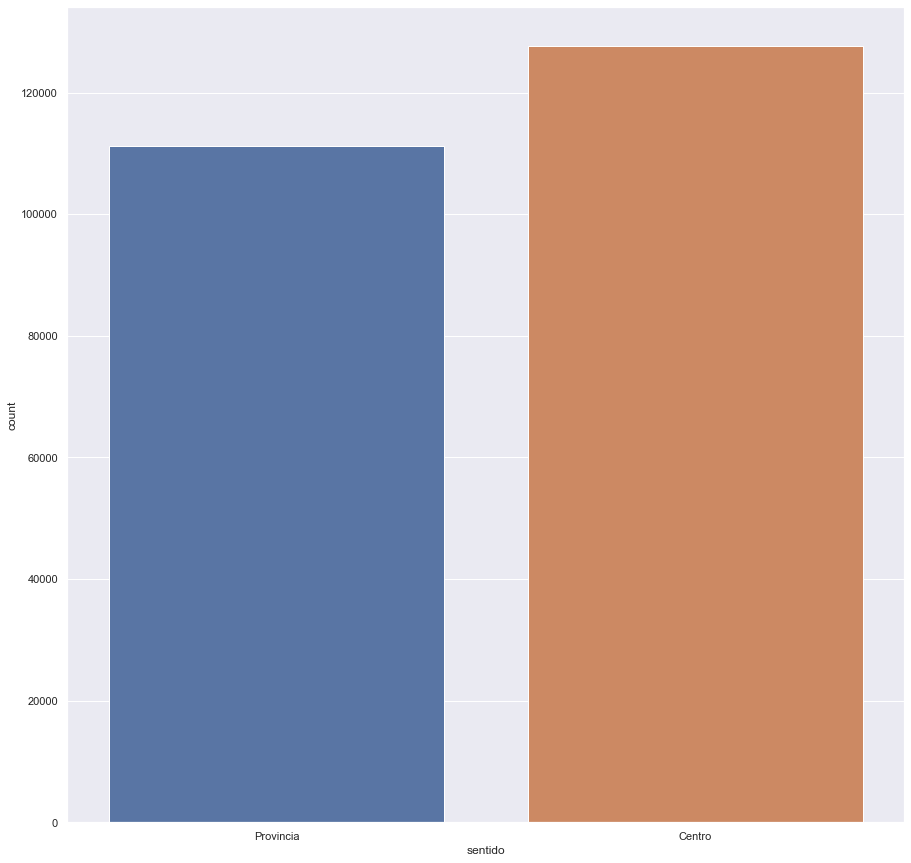

In [375]:
sns.countplot(dataset.sentido)

El sentido hacia el centro acapara más cruces. 
Tiene sentido ya que en sentido centro el peaje se cobra para pasar para el lado del aeropuerto ubicado cerca del peaje.

Ahora veamos que fecha fue la que más pases se registraron.

In [376]:
mask_f = diario[diario.cantidad_pasos>=(diario.cantidad_pasos.mean()+ diario.cantidad_pasos.std())]
mask_f.sort_values('cantidad_pasos',ascending= False)

cantidad_pasos
fecha                     
2017-12-07         63127.0
2017-11-24         61594.0
2017-10-13         61421.0
2017-11-10         61382.0
2017-11-17         61259.0
...                    ...
2017-09-19         51556.0
2018-01-18         51548.0
2017-02-13         51546.0
2017-05-11         51543.0
2017-10-28         51497.0

[197 rows x 1 columns]

El 07/12/2017 se registraron 63127 pases siendo el dia que mas frecuencia de autos hubo.

Vamos a comparar por año el comportamiento de la estacion Illia en cuanto a los métodos de pago en efectivo y por Telepase.

In [377]:
data17= data_2017.copy()
data17= data17[data17.estacion== 'Illia']
data17

periodo       fecha  hora_inicio  hora_fin      dia estacion  \
1749        2017  2017-01-01            0         1  Domingo    Illia   
1750        2017  2017-01-01            0         1  Domingo    Illia   
1751        2017  2017-01-01            0         1  Domingo    Illia   
1752        2017  2017-01-01            0         1  Domingo    Illia   
1753        2017  2017-01-01            0         1  Domingo    Illia   
...          ...         ...          ...       ...      ...      ...   
1372324     2017  2017-12-31           22        23  Domingo    Illia   
1372325     2017  2017-12-31           22        23  Domingo    Illia   
1372326     2017  2017-12-31           22        23  Domingo    Illia   
1372327     2017  2017-12-31           23         0  Domingo    Illia   
1372328     2017  2017-12-31           23         0  Domingo    Illia   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
1749        Centro       Liviano  NO COBRADO             252  
1750        Centro       Liviano    EFECTIVO               1  
1751        Centro       Liviano    TELEPASE             100  
1752        Centro        Pesado    TELEPASE               2  
1753        Centro        Pesado    TELEPASE               1  
...            ...           ...         ...             ...  
1372324  Provincia        Pesado    EFECTIVO               1  
1372325  Provincia        Pesado    TELEPASE               2  
1372326  Provincia        Pesado    EFECTIVO               1  
1372327  Provincia       Liviano  NO COBRADO              99  
1372328  Provincia       Liviano    TELEPASE              25  

[291900 rows x 10 columns]

In [378]:
data17.describe(include= 'all')

periodo       fecha    hora_inicio       hora_fin      dia estacion  \
count   291900.0      291900  291900.000000  291900.000000   291900   291900   
unique       NaN         365            NaN            NaN        7        1   
top          NaN  2017-01-30            NaN            NaN  Viernes    Illia   
freq         NaN         906            NaN            NaN    43944   291900   
mean      2017.0         NaN      11.951011      12.080877      NaN      NaN   
std          0.0         NaN       6.535413       6.603749      NaN      NaN   
min       2017.0         NaN       0.000000       0.000000      NaN      NaN   
25%       2017.0         NaN       7.000000       7.000000      NaN      NaN   
50%       2017.0         NaN      12.000000      12.000000      NaN      NaN   
75%       2017.0         NaN      17.000000      18.000000      NaN      NaN   
max       2017.0         NaN      23.000000      23.000000      NaN      NaN   

       sentido tipo_vehiculo forma_pago  cantidad_pasos  
count   291900        291900     291900   291900.000000  
unique       2             2          7             NaN  
top     Centro        Pesado   EFECTIVO             NaN  
freq    160328        161166     104230             NaN  
mean       NaN           NaN        NaN      115.007139  
std        NaN           NaN        NaN      347.277410  
min        NaN           NaN        NaN        1.000000  
25%        NaN           NaN        NaN        2.000000  
50%        NaN           NaN        NaN        6.000000  
75%        NaN           NaN        NaN       23.000000  
max        NaN           NaN        NaN     3782.000000

In [379]:
data17['forma_pago'].value_counts()

EFECTIVO                104230
TELEPASE                 79903
EXENTO                   39201
INFRACCION               24526
TARJETA DISCAPACIDAD     22145
NO COBRADO               21881
MONEDERO                    14
Name: forma_pago, dtype: int64

Vemos como en el año 2017 hubo una gran diferencia entre efectivo y Telepase

In [380]:
data18= data_2018.copy()
data18=data18[data18.estacion=='Illia']
data18

periodo       fecha  hora_inicio  hora_fin    dia estacion  \
1768        2018  2018-01-01            0         1  Lunes    Illia   
1769        2018  2018-01-01            0         1  Lunes    Illia   
1770        2018  2018-01-01            0         1  Lunes    Illia   
1771        2018  2018-01-01            0         1  Lunes    Illia   
1772        2018  2018-01-01            1         2  Lunes    Illia   
...          ...         ...          ...       ...    ...      ...   
1375532     2018  2018-12-31           22        23  Lunes    Illia   
1375533     2018  2018-12-31           23         0  Lunes    Illia   
1375534     2018  2018-12-31           23         0  Lunes    Illia   
1375535     2018  2018-12-31           23         0  Lunes    Illia   
1375536     2018  2018-12-31           23         0  Lunes    Illia   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
1768        Centro       Liviano  NO COBRADO             127  
1769        Centro       Liviano    EFECTIVO               8  
1770        Centro       Liviano    TELEPASE              68  
1771        Centro        Pesado    TELEPASE               1  
1772        Centro       Liviano  NO COBRADO               3  
...            ...           ...         ...             ...  
1375532  Provincia        Pesado    TELEPASE               3  
1375533  Provincia       Liviano  NO COBRADO              95  
1375534  Provincia       Liviano    EFECTIVO               4  
1375535  Provincia       Liviano  INFRACCION               1  
1375536  Provincia       Liviano    TELEPASE              36  

[299519 rows x 10 columns]

In [381]:
data18.describe(include='all')

periodo       fecha    hora_inicio       hora_fin        dia  \
count   299519.0      299519  299519.000000  299519.000000     299519   
unique       NaN         365            NaN            NaN          7   
top          NaN  2018-10-05            NaN            NaN  Miércoles   
freq         NaN         960            NaN            NaN      45522   
mean      2018.0         NaN      11.932589      12.045807        NaN   
std          0.0         NaN       6.552504       6.618378        NaN   
min       2018.0         NaN       0.000000       0.000000        NaN   
25%       2018.0         NaN       7.000000       7.000000        NaN   
50%       2018.0         NaN      12.000000      12.000000        NaN   
75%       2018.0         NaN      17.000000      18.000000        NaN   
max       2018.0         NaN      23.000000      23.000000        NaN   

       estacion sentido tipo_vehiculo forma_pago  cantidad_pasos  
count    299519  299519        299519     299519   299519.000000  
unique        1       2             2          6             NaN  
top       Illia  Centro        Pesado   EFECTIVO             NaN  
freq     299519  154648        163619      99996             NaN  
mean        NaN     NaN           NaN        NaN      115.151419  
std         NaN     NaN           NaN        NaN      354.717350  
min         NaN     NaN           NaN        NaN        1.000000  
25%         NaN     NaN           NaN        NaN        2.000000  
50%         NaN     NaN           NaN        NaN        5.000000  
75%         NaN     NaN           NaN        NaN       20.000000  
max         NaN     NaN           NaN        NaN     5224.000000

In [382]:
data18['forma_pago'].value_counts()

EFECTIVO                99996
TELEPASE                89921
EXENTO                  37498
INFRACCION              29459
NO COBRADO              23454
TARJETA DISCAPACIDAD    19191
Name: forma_pago, dtype: int64

Aca vemos como sigue siendo más utilizado el efectivo como método de pago, pero a su vez el Telepase tomo mayor impulso y la diferencia entre estos se redujo a la mitad.
También podemos ver como en 2018 se extinguió la modalidad de "Monedero".

In [383]:
data19=data_2019.copy()
data19=data19[data19.estacion=='Illia']
data19

periodo       fecha  hora_inicio  hora_fin     dia estacion  \
19         2019  2019-01-01            0         1  Martes    Illia   
20         2019  2019-01-01            0         1  Martes    Illia   
21         2019  2019-01-01            0         1  Martes    Illia   
22         2019  2019-01-01            0         1  Martes    Illia   
23         2019  2019-01-01            0         1  Martes    Illia   
...         ...         ...          ...       ...     ...      ...   
812133     2019  2019-12-31           23         0  Martes    Illia   
812134     2019  2019-12-31           23         0  Martes    Illia   
812135     2019  2019-12-31           23         0  Martes    Illia   
812136     2019  2019-12-31           23         0  Martes    Illia   
812137     2019  2019-12-31           23         0  Martes    Illia   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
19         Centro       Liviano  NO COBRADO             146  
20         Centro       Liviano    TELEPASE              59  
21         Centro        Pesado    TELEPASE               1  
22      Provincia       Liviano  NO COBRADO             147  
23      Provincia       Liviano    TELEPASE             106  
...           ...           ...         ...             ...  
812133     Centro       Liviano    TELEPASE              39  
812134     Centro        Pesado    TELEPASE               2  
812135  Provincia       Liviano  NO COBRADO             145  
812136  Provincia       Liviano    TELEPASE              26  
812137  Provincia        Pesado  NO COBRADO               2  

[161133 rows x 10 columns]

In [384]:
data19.describe(include='all')

periodo       fecha    hora_inicio       hora_fin     dia estacion  \
count   161133.0      161133  161133.000000  161133.000000  161133   161133   
unique       NaN         365            NaN            NaN       7        1   
top          NaN  2019-03-15            NaN            NaN  Martes    Illia   
freq         NaN         480            NaN            NaN   23602   161133   
mean      2019.0         NaN      11.770004      11.827180     NaN      NaN   
std          0.0         NaN       6.718099       6.759874     NaN      NaN   
min       2019.0         NaN       0.000000       0.000000     NaN      NaN   
25%       2019.0         NaN       6.000000       6.000000     NaN      NaN   
50%       2019.0         NaN      12.000000      12.000000     NaN      NaN   
75%       2019.0         NaN      17.000000      18.000000     NaN      NaN   
max       2019.0         NaN      23.000000      23.000000     NaN      NaN   

          sentido tipo_vehiculo forma_pago  cantidad_pasos  
count      161133        161133     161133   161133.000000  
unique          2             2          6             NaN  
top     Provincia       Liviano   TELEPASE             NaN  
freq        81283        100861      34788             NaN  
mean          NaN           NaN        NaN      211.968790  
std           NaN           NaN        NaN      488.961921  
min           NaN           NaN        NaN        1.000000  
25%           NaN           NaN        NaN        4.000000  
50%           NaN           NaN        NaN       12.000000  
75%           NaN           NaN        NaN       68.000000  
max           NaN           NaN        NaN     5330.000000

In [385]:
data19['forma_pago'].value_counts()

TELEPASE           34788
EFECTIVO           34643
EXENTO             29204
INFRACCION         24015
NO COBRADO         21344
T. DISCAPACIDAD    17139
Name: forma_pago, dtype: int64

Aquí vemos que la tendencia al alza del Telepase se cumple también en 2019.
Esto puede ser por comodidad de los usuarios y también la implementación a nivel Nacional en aumento del llamado Telepase.
Además de que ofrece descuentos por cada peaje pagado.

## Análisis de forma de pagos

A continuación vamos a crear el dataset para trabajar con las formas de pago efectivo y telepase.

Ahora haremos lo mismo pero con Telepase

In [386]:
pagos = pd.concat([data_2019, data_2018, data_2017])

mask = np.logical_and(pagos.estacion=='Illia', pagos.forma_pago == 'TELEPASE')
pagos = pagos[mask]


pagos.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

pagos['fecha2'] = pd.to_datetime(pagos.fecha) + pd.to_timedelta(pagos.hora_fin, unit = 'h')

pagos.drop(columns=['fecha','hora_fin'], inplace = True)

pagos.rename(columns = {'fecha2':'fecha'}, inplace = True) 

pagos.sort_values('fecha', inplace = True)
pagos.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi lograr una visualización mas amigable
pagos_d = pagos.resample('D', on = 'fecha').sum()

Ahora veremos gráficamente como fue la migración de los pagos a lo largo de los años

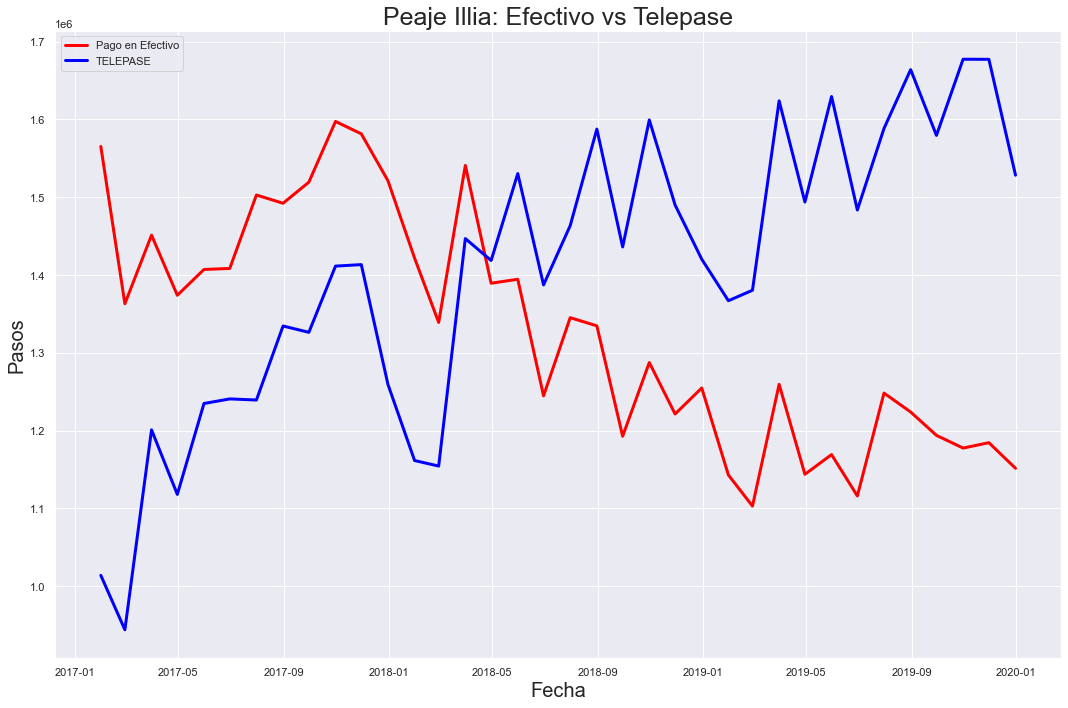

In [387]:
mensual= pagos.resample('M', on='fecha').sum()
mensual1= dataset.resample('M', on='fecha').sum()

plt.figure(figsize=(15,10))
plt.plot(mensual1.index, mensual1.cantidad_pasos,lw=3, color='red', label='Pago en Efectivo')
plt.plot(mensual.index, mensual.cantidad_pasos, lw=3, color='blue', label='TELEPASE')
plt.title('Peaje Illia: Efectivo vs Telepase', size=25)
plt.xlabel('Fecha', size= 20)
plt.ylabel('Pasos', size= 20)
plt.legend()
plt.tight_layout()
plt.show()

Aquí vemos gráficamente lo que veníamos estudiando. 

Los usuarios de este peaje en particular migraron en estos 3 años de forma paulatina hacia la forma de Telepase. Vemos que el En principios de 2018 se revirtió la tendencia en las formas de pago.


## A continuación vamos a comparar la estación Illia con la estación de Avellaneda. 

La elección de la estación de Avellaneda es porque la ubicación de ésta se encuentra al otro extremo de Illia y vamos a ver si el comportamiento para esta parte de la AUSA respeta la tendencia.

In [388]:
# Repetimos los pasos anteriores
ave = pd.concat([data_2019, data_2018, data_2017])

mask = np.logical_and(ave.estacion== 'Avellaneda', ave.forma_pago== 'EFECTIVO')
ave = ave[mask]
ave.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
ave['fecha2'] = pd.to_datetime(ave.fecha) + pd.to_timedelta(ave.hora_fin, unit = 'h')
ave.drop(columns=['fecha','hora_fin'], inplace = True)
ave.rename(columns = {'fecha2':'fecha'}, inplace = True)
ave.sort_values('fecha', inplace = True)
ave.reset_index(drop=True, inplace = True)
diario_e = ave.resample('D', on = 'fecha').sum()
diario_e.head()

cantidad_pasos
fecha                     
2017-01-01           72504
2017-01-02           87547
2017-01-03           86139
2017-01-04           88180
2017-01-05           90281

In [389]:
diario_e.shape

(1095, 1)

In [390]:
avt = pd.concat([data_2019, data_2018, data_2017])

mask1 = np.logical_and(avt.estacion== 'Avellaneda', avt.forma_pago== 'TELEPASE')
avt = avt[mask1]
avt.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
avt['fecha2'] = pd.to_datetime(avt.fecha) + pd.to_timedelta(avt.hora_fin, unit = 'h')
avt.drop(columns=['fecha','hora_fin'], inplace = True)
avt.rename(columns = {'fecha2':'fecha'}, inplace = True)
avt.sort_values('fecha', inplace = True)
avt.reset_index(drop=True, inplace = True)
diario_t = avt.resample('D', on = 'fecha').sum()
diario_t.head()

cantidad_pasos
fecha                     
2017-01-01           22024
2017-01-02           43988
2017-01-03           46780
2017-01-04           46623
2017-01-05           48311

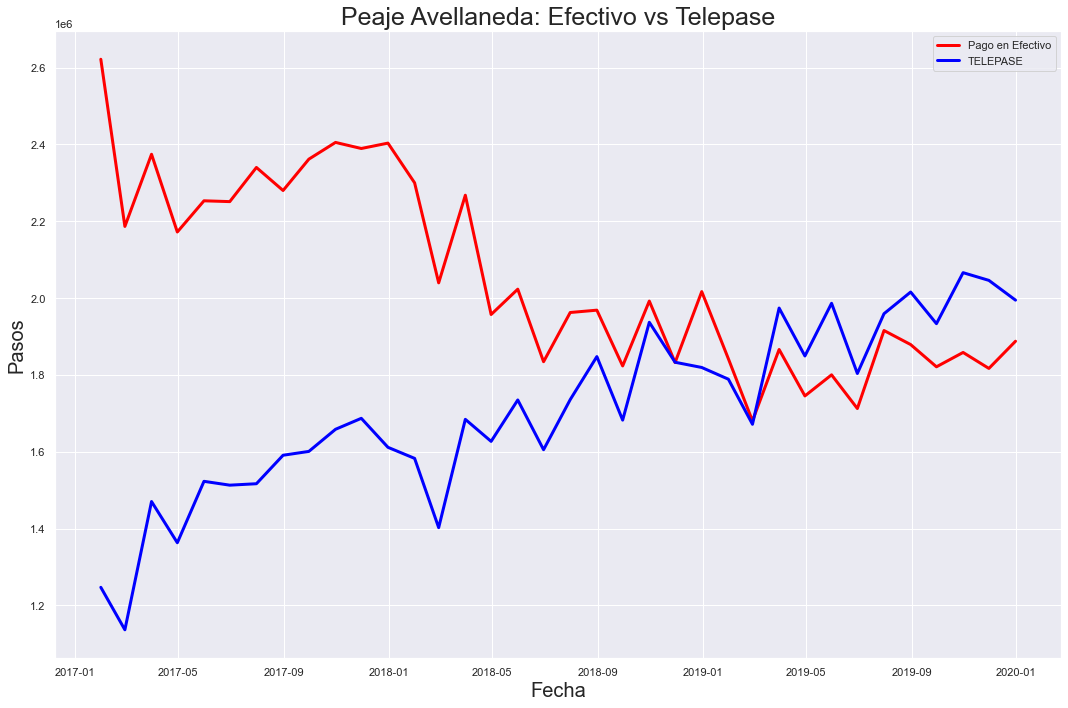

In [391]:
mensuald1= ave.resample('M', on='fecha').sum()
mensuald= avt.resample('M', on='fecha').sum()



plt.figure(figsize=(15,10))
plt.plot(mensuald1.index, mensuald1.cantidad_pasos,lw=3, color='red', label='Pago en Efectivo')
plt.plot(mensuald.index, mensuald.cantidad_pasos, lw=3, color='blue', label='TELEPASE')
plt.title('Peaje Avellaneda: Efectivo vs Telepase', size=25)
plt.xlabel('Fecha', size= 20)
plt.ylabel('Pasos', size= 20)
plt.legend()
plt.tight_layout()
plt.show()

Podemos ver que en la estacion Avellaneda, el cambio de efectivo a telepase se da en 2019 recién. Y luego vemos un comportamiento distinto al del pejae Illia, en esta estacion vemos que la diferencia es poca entre un método y el otro.

Aquí la hipótesis que genero es que la ubicación influye drásticamente en este medio de pago.

Empezaremos haciendo un resampleo con la suma de los datos interpolados y el dataset original.
Hacemos el resampleo por semana en los datos interpolados.

## Resampleos.

A partir de aquí vamos a realizar distintos tipos de Resampleos en los datos para ver cuál es la forma más conveniente para nuestro estudio.

In [392]:
sema= diario.resample('W').sum()
sema.shape
sema

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-08        347212.0
2017-01-15        366413.0
2017-01-22        357215.0
2017-01-29        354581.0
...                    ...
2019-12-08        282891.0
2019-12-15        272960.0
2019-12-22        292881.0
2019-12-29        226390.0
2020-01-05         55970.0

[158 rows x 1 columns]

In [393]:
sema1 = dataset.resample('W', on='fecha').sum()
sema1.shape
sema

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-08        347212.0
2017-01-15        366413.0
2017-01-22        357215.0
2017-01-29        354581.0
...                    ...
2019-12-08        282891.0
2019-12-15        272960.0
2019-12-22        292881.0
2019-12-29        226390.0
2020-01-05         55970.0

[158 rows x 1 columns]

In [394]:
import matplotlib.gridspec as gridspec

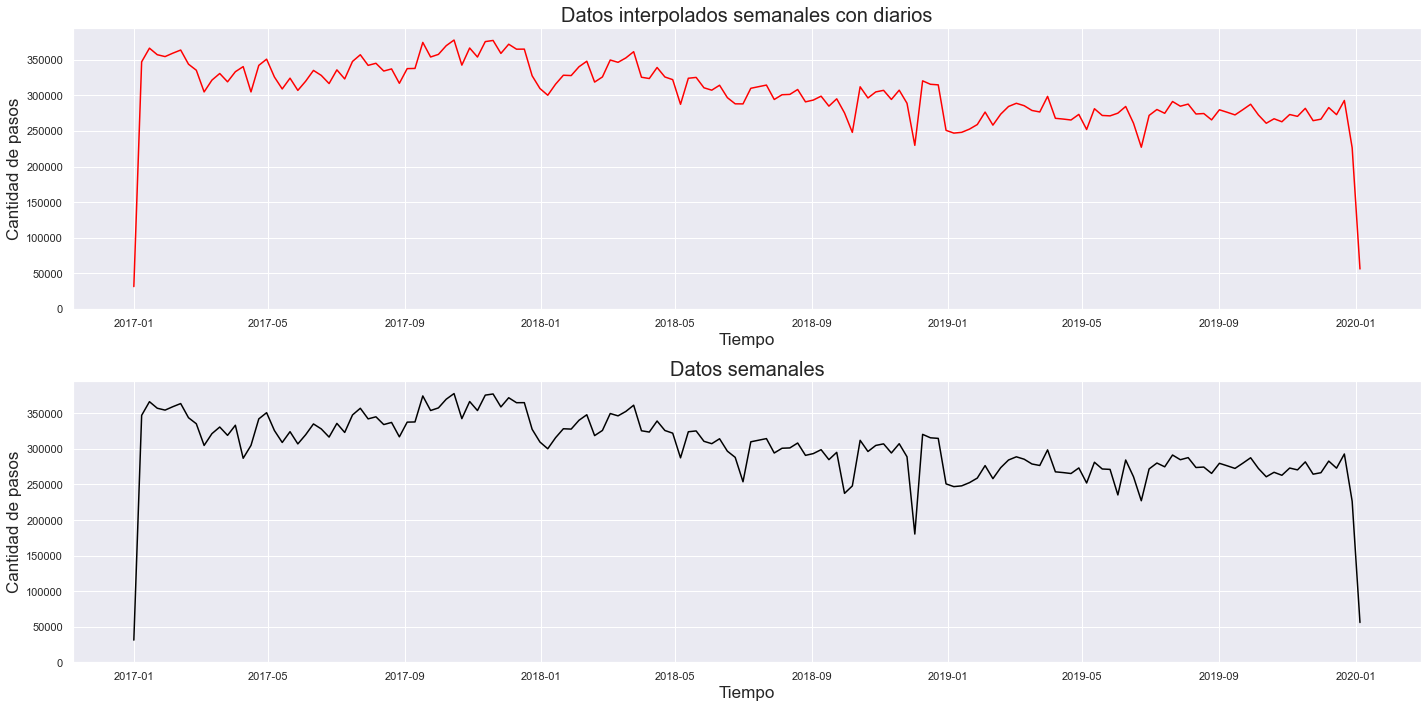

In [395]:
plt.figure(figsize=(20,10))
g= gridspec.GridSpec(2,1)
ax0= plt.subplot(g[0])
plt.plot(sema.index, sema.cantidad_pasos, color='red')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos interpolados semanales con diarios', size= 20)
plt.ylim(0)

ax1=plt.subplot(g[1])
plt.plot(sema1.index, sema1.cantidad_pasos, color= 'Black')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos semanales', size=20)
plt.ylim(0)
plt.tight_layout()
plt.show()

Podemos observar en este primer resampleo que los valores en el set interpolado están mas "suaves" con respecto al gráfico del dataset original, donde más podemos ver esta diferencia es donde empieza el 2019.

De esto nos vamos a quedar con el resampleo ya interpolado y vamos  comparar el gráfico semanal con el diario.

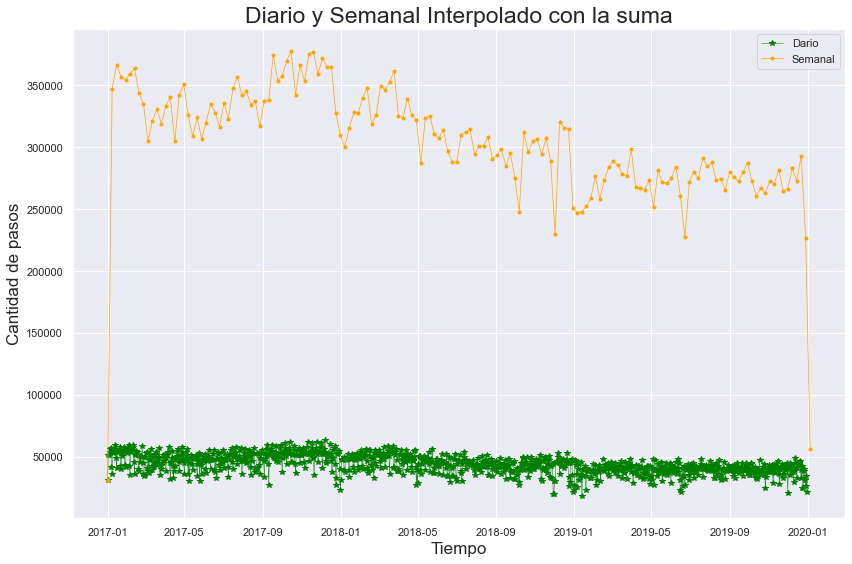

In [396]:
plt.figure(figsize=(12,8))
plt.plot(diario, marker='*', linestyle='-', linewidth=0.5, label='Dario', color='green')
plt.plot(sema, marker='.', linestyle='-', linewidth=0.7, label='Semanal', color='orange')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Diario y Semanal Interpolado con la suma', size= 23)
plt.legend()
plt.tight_layout()
plt.show()

Aquí vemos que los puntos de la serie semanal coincide con la serie diaria. Es decir, en los puntos más bajos de la semanal vemos que en la serie diaria se respeta esa tendencia.

Una vez hecho el resampleo con la suma, proseguiré a realizarlo de la misma manera pero utilizando la media.

In [397]:
sema_m= diario.resample('W').mean()
sema_m

cantidad_pasos
fecha                     
2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
...                    ...
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    27985.000000

[158 rows x 1 columns]

In [398]:
diario1=dataset.resample('D', on='fecha').sum()
sema_m1= diario1.resample('W').mean()
sema_m1

cantidad_pasos
fecha                     
2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
...                    ...
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    27985.000000

[158 rows x 1 columns]

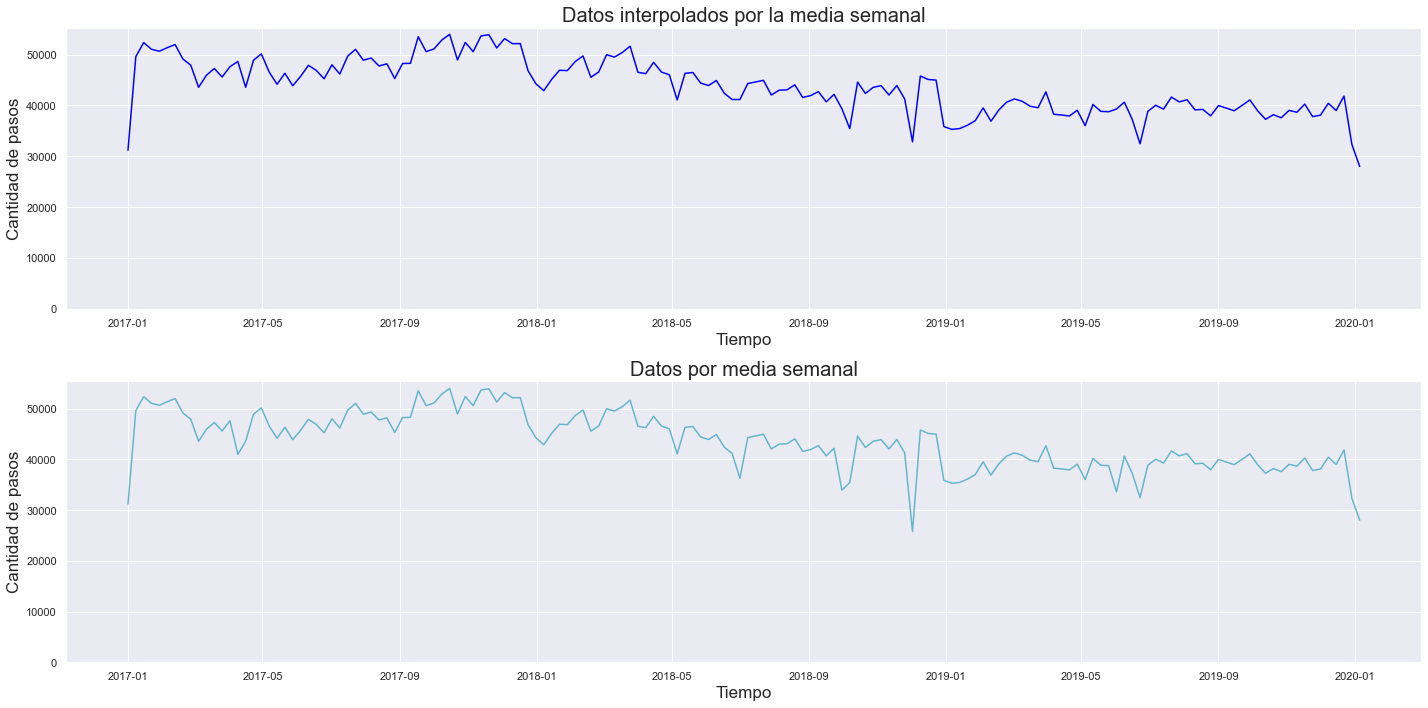

In [399]:
plt.figure(figsize=(20,10))
g= gridspec.GridSpec(2,1)
ax0= plt.subplot(g[0])
plt.plot(sema.index, sema_m.cantidad_pasos, color='blue')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos interpolados por la media semanal', size= 20)
plt.ylim(0)

ax1=plt.subplot(g[1])
plt.plot(sema1.index, sema_m1.cantidad_pasos, color= 'c')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos por media semanal', size=20)
plt.ylim(0)
plt.tight_layout()
plt.show()

Seguimos observando el mismo comportamiento visto hasta ahora.

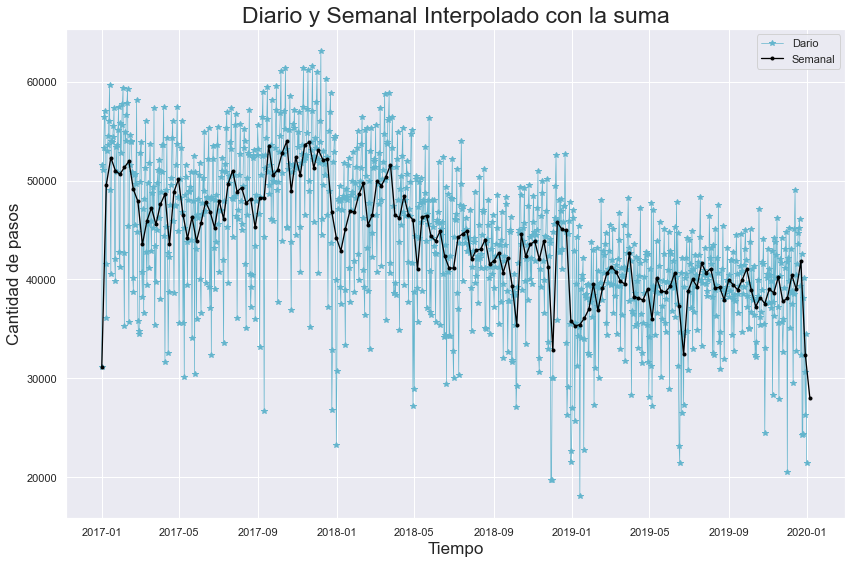

In [400]:
plt.figure(figsize=(12,8))
plt.plot(diario, marker='*', linestyle='-', linewidth=0.7, label='Dario', color='c')
plt.plot(sema_m, marker='.', linestyle='-', linewidth=1.3, label='Semanal', color='black')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Diario y Semanal Interpolado con la suma', size= 23)
plt.legend()
plt.tight_layout()
plt.show()

Viendo los gráficos podemos ver que la media semanal es más "suave" por los remuestreos realiazados, por esto es que vamos a utilizar esta medida para aplicarlas en nuestros modelos.

## Descomposición de la serie.

In [401]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [402]:
import statsmodels.tsa as tsa
# Descomposicion Multipicativa 
result_mul = tsa.seasonal.seasonal_decompose(diario.cantidad_pasos, model='multiplicative', extrapolate_trend='freq')

# Descomposicion Aditiva
result_add = tsa.seasonal.seasonal_decompose(diario.cantidad_pasos, model='additive', extrapolate_trend='freq')

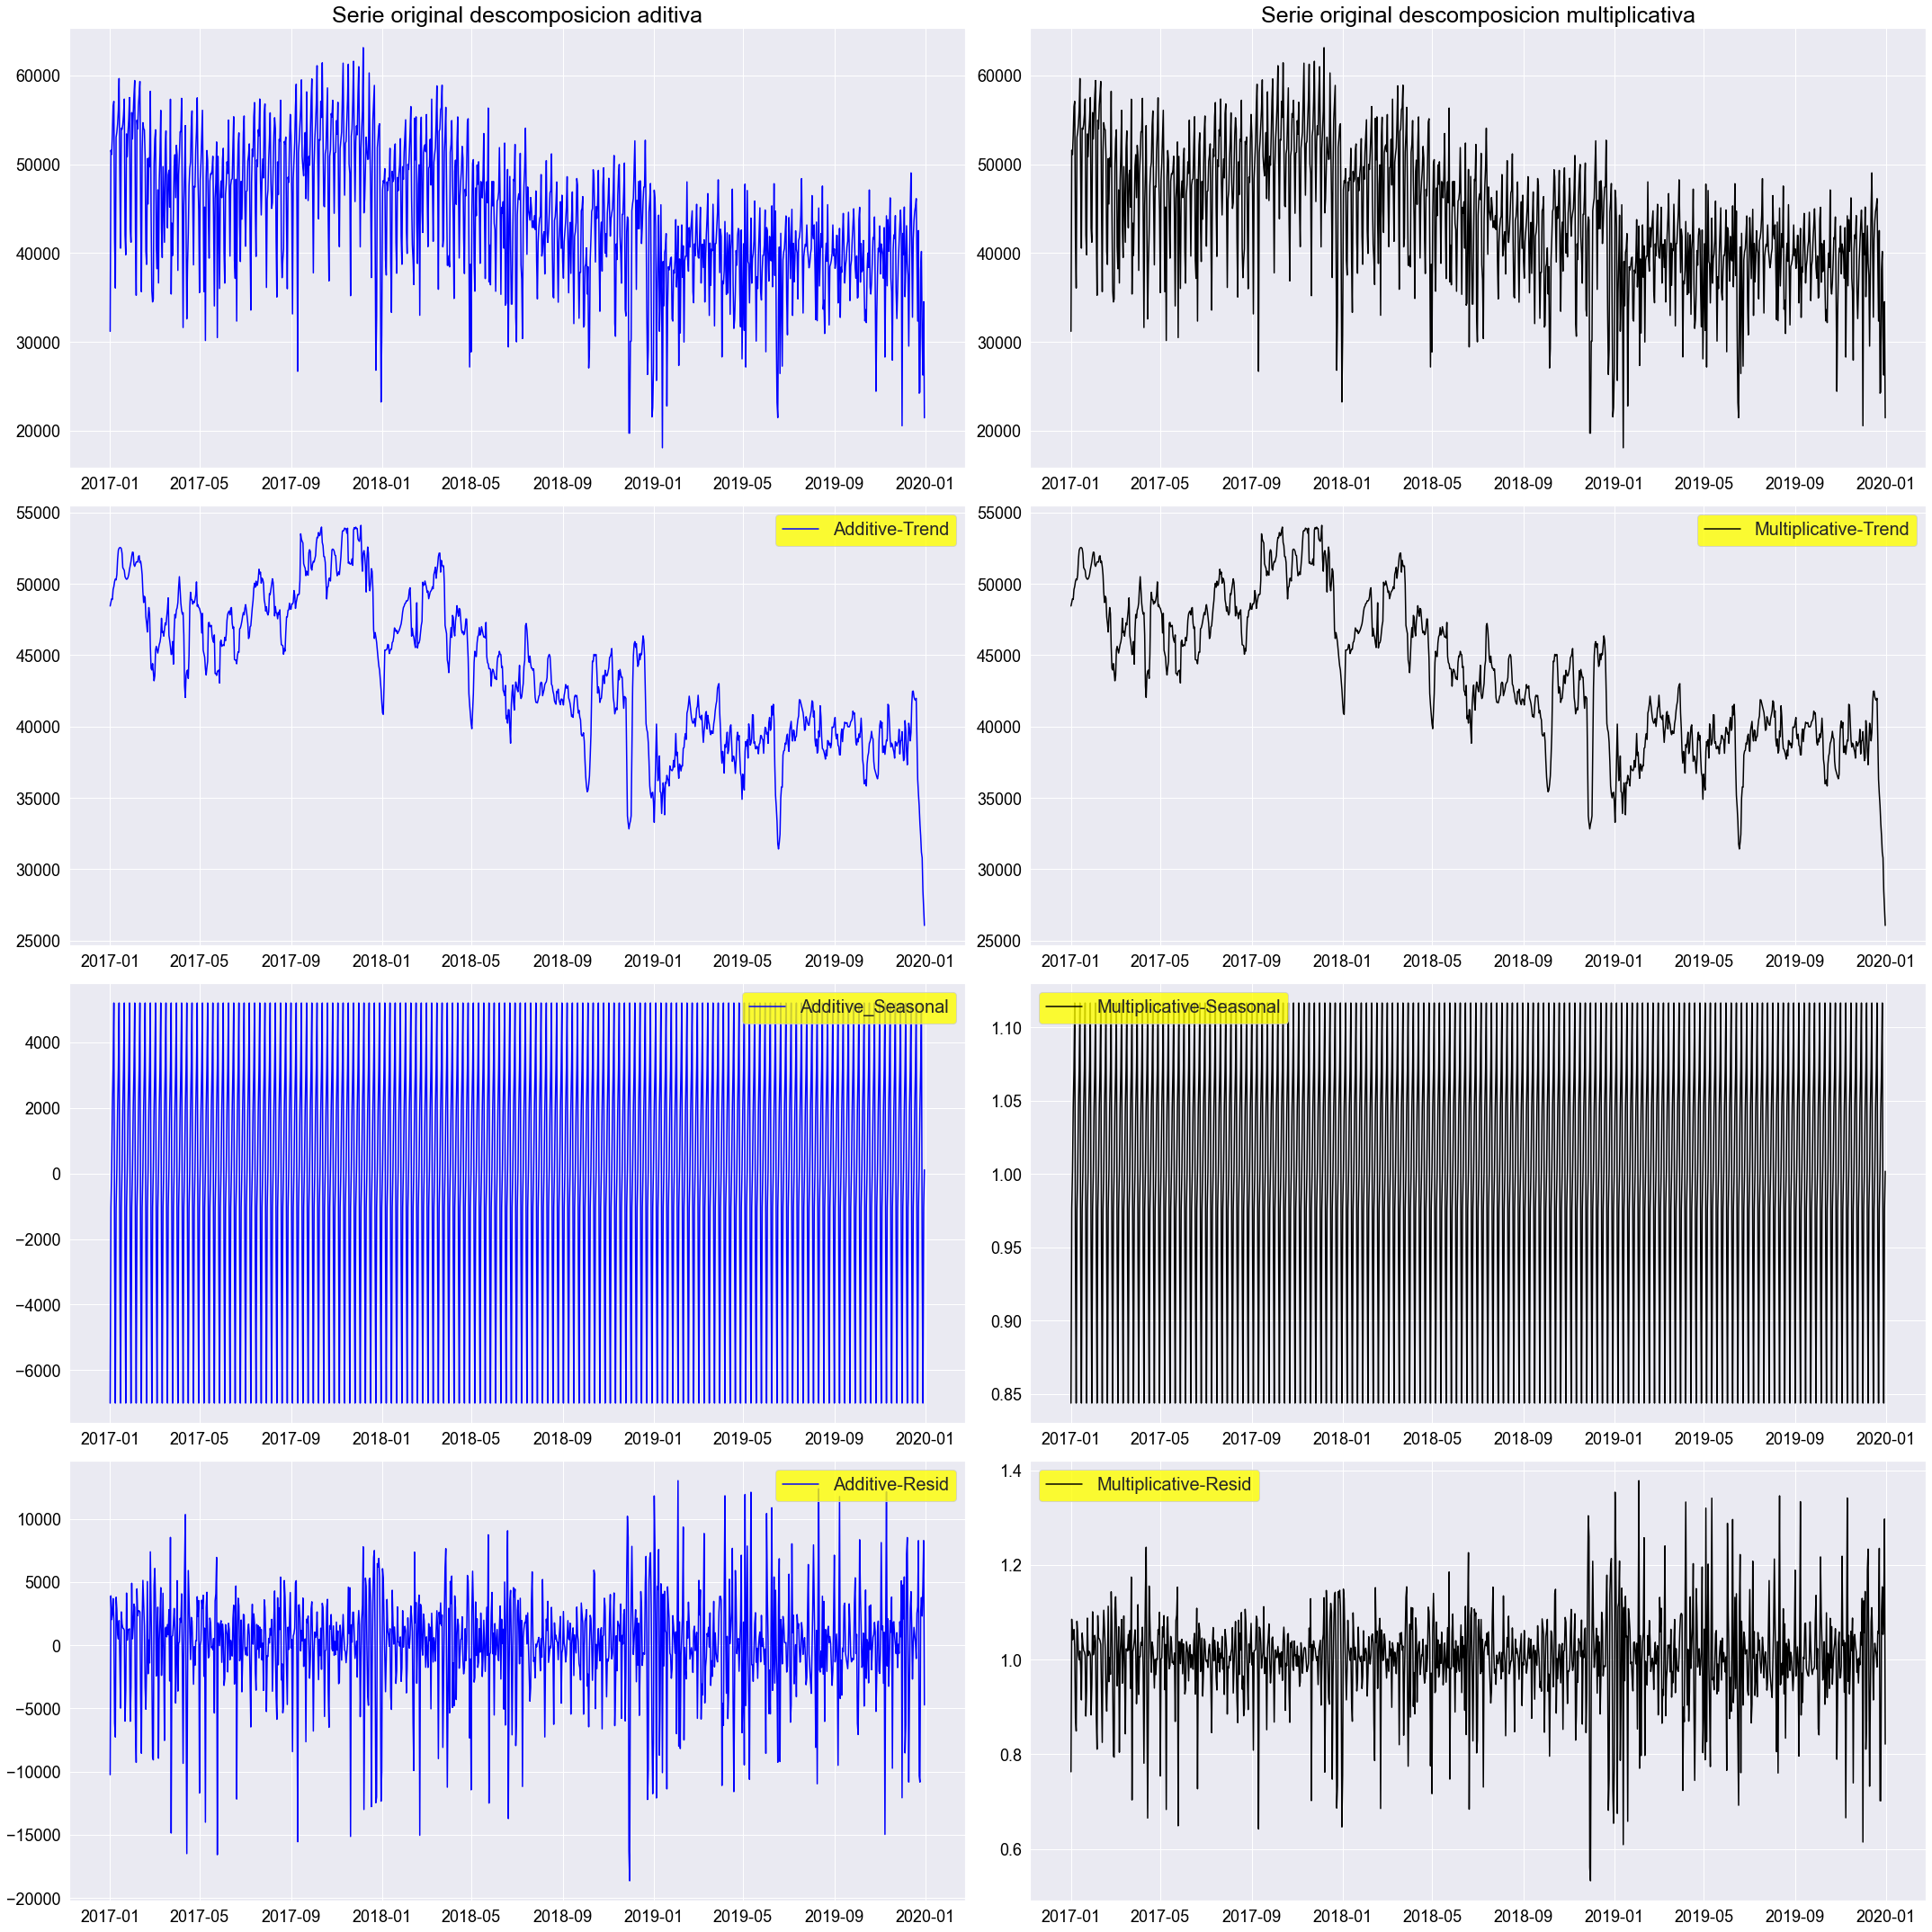

In [403]:
plt.figure(figsize = (30,30))
Gs= gridspec.GridSpec(4,2)

ax0= plt.subplot(Gs[0])
plt.plot(diario,color='blue')
plt.title("Serie original descomposicion aditiva", color= 'black', fontsize= 25)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax1= plt.subplot(Gs[1])
plt.plot(diario,color='black')
plt.title("Serie original descomposicion multiplicativa", color= 'black', fontsize= 25)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax2= plt.subplot(Gs[2])
plt.plot(result_add.trend,color='blue', label="Additive-Trend")
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax3= plt.subplot(Gs[3])
plt.plot(result_mul.trend,color='black', label='Multiplicative-Trend')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax4= plt.subplot(Gs[4])
plt.plot(result_add.seasonal,color='blue', label='Additive_Seasonal')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)


ax5= plt.subplot(Gs[5])
plt.plot(result_mul.seasonal,color='black', label='Multiplicative-Seasonal')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax6= plt.subplot(Gs[6])
plt.plot(result_add.resid,color='blue', label='Additive-Resid')
plt.legend(fontsize=20, facecolor= 'yellow', loc= 1)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax7= plt.subplot(Gs[7])
plt.plot(result_mul.resid,color='black', label='Multiplicative-Resid')
plt.legend(fontsize=20, facecolor= 'yellow', loc= 2)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)


plt.tight_layout()
plt.show()

Aquí encontramos con que es muy similar el comportamiento en el proceso multiplicativo como en el aditivo.
La diferencia la podemos encontrar en el último gráfico donde vemos el residuo de la serie.
Observo que en la gráfica aditiva la media es en torno a 0 con un comportamiento aleatorio, es decir, un ruido blanco. Contrariamente a esto en la multiplicativa vemos que la media esta en torno a 1.

Dicho esto proseguiré trabajando con la descomposición aditiva en la media semanal.

In [404]:
dec = seasonal_decompose(sema_m.cantidad_pasos, model='additive')

In [405]:
dec.trend

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: trend, Length: 158, dtype: float64

In [406]:
dec.seasonal

fecha
2017-01-01   -4360.102709
2017-01-08   -5237.804632
2017-01-15   -3970.977023
2017-01-22   -2652.969468
2017-01-29   -2144.821803
                 ...     
2019-12-08    4268.610203
2019-12-15    4009.297703
2019-12-22    1383.071054
2019-12-29   -4360.102709
2020-01-05   -5237.804632
Freq: W-SUN, Name: seasonal, Length: 158, dtype: float64

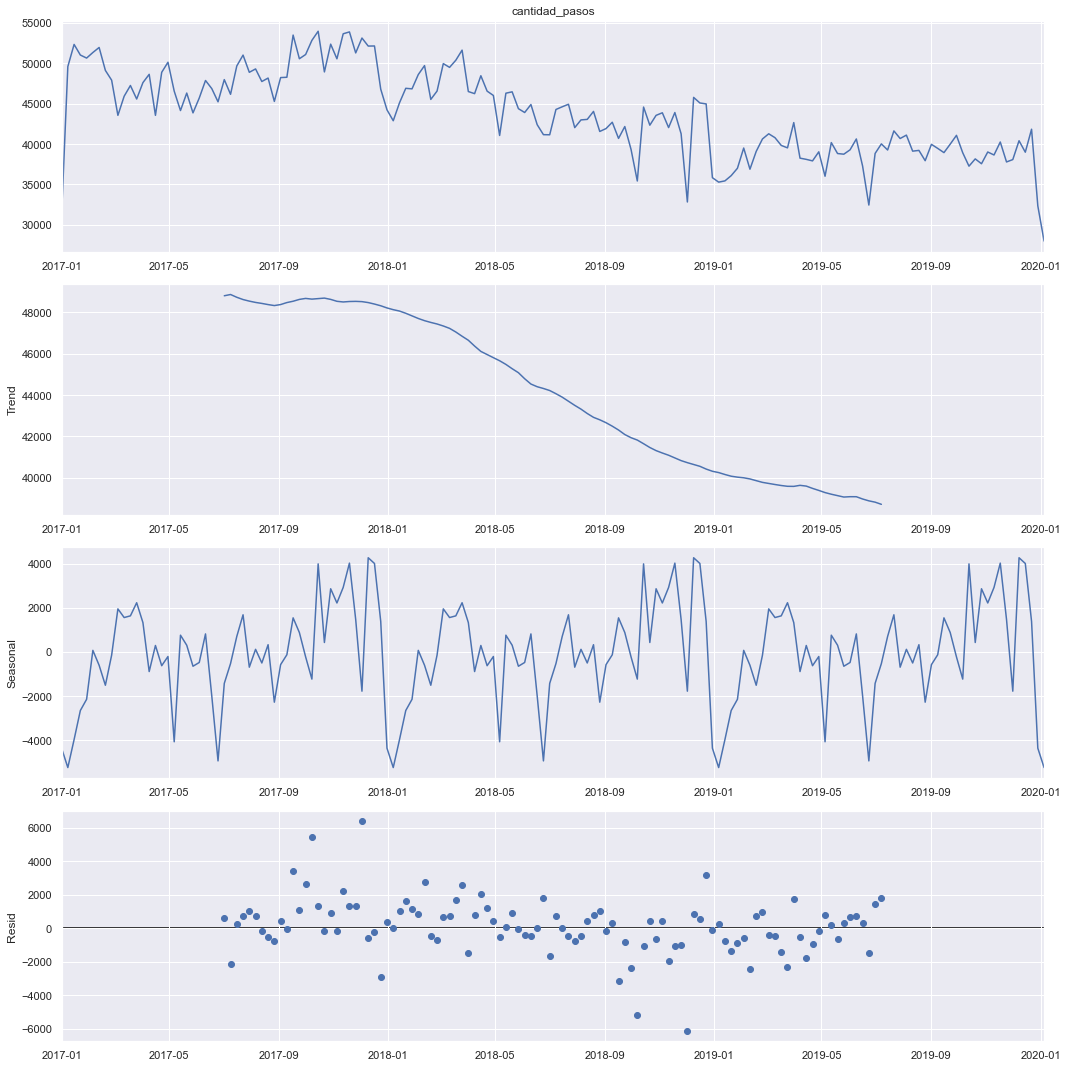

In [407]:
plt.rcParams['figure.figsize']= [15,15]
dec.plot()
plt.show()

Lo que podemos sacar de estos gráficos es que la tendencia es a la baja con el pasar del tiempo, la estacionalidad de nuestra serie es anual, si vemos año por año el comportamiento es similar, y el ruido es totalmente al azar, no tiene un patrón en su comportamiento, excepto de que esta realtivamente cerca de 0.
A continuación voy a corroborar una vez más este residuo viendo su distribución.

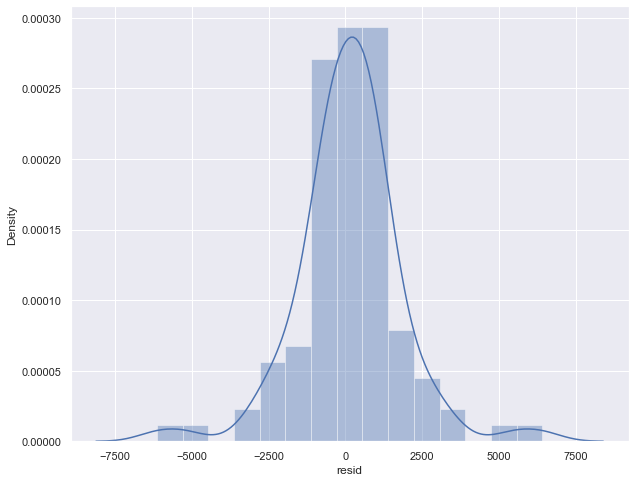

In [408]:
plt.figure(figsize=(10,8))
sns.distplot(dec.resid, bins= 15, label='Residuos')
plt.show()

## Autocorrelación.

Primero importaremos la funcion acf de statsmodels para realizar este procedimiento y buscaremos el mejor número del parámetro nlags para nuestra serie, en este caso lo multiplicaremos por 3 ya que son 3 los años que tenemos a disposición.

In [409]:
from statsmodels.tsa.stattools import acf

In [410]:
nlags= 52 *3
autoc= acf(sema_m.cantidad_pasos, nlags= nlags, fft=False)
autoc.shape

(157,)

Text(0.5, 0, 'lag')

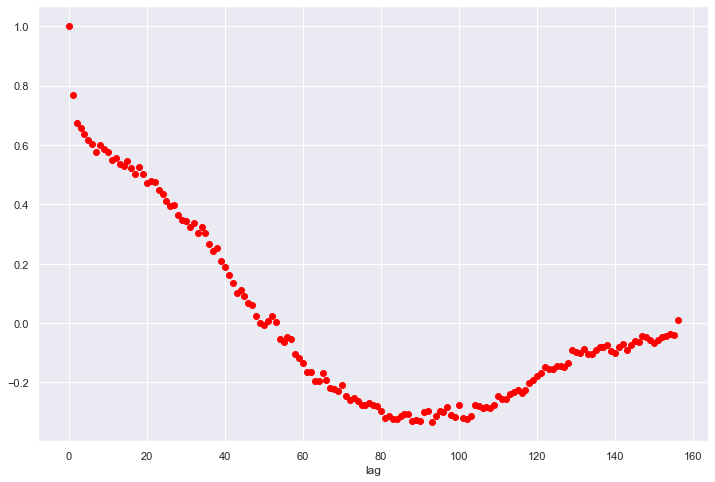

In [411]:
plt.figure(figsize = (12,8))
plt.scatter(np.arange(nlags+1), autoc,color='red')
plt.xlabel('lag')

Probando el valor de nlags, sabiendo que por defecto el valor es 40, fuimos elevando este número llegando hasta el 52 porque a partir de aquí en adelante se presentaba un error al correr la celda.

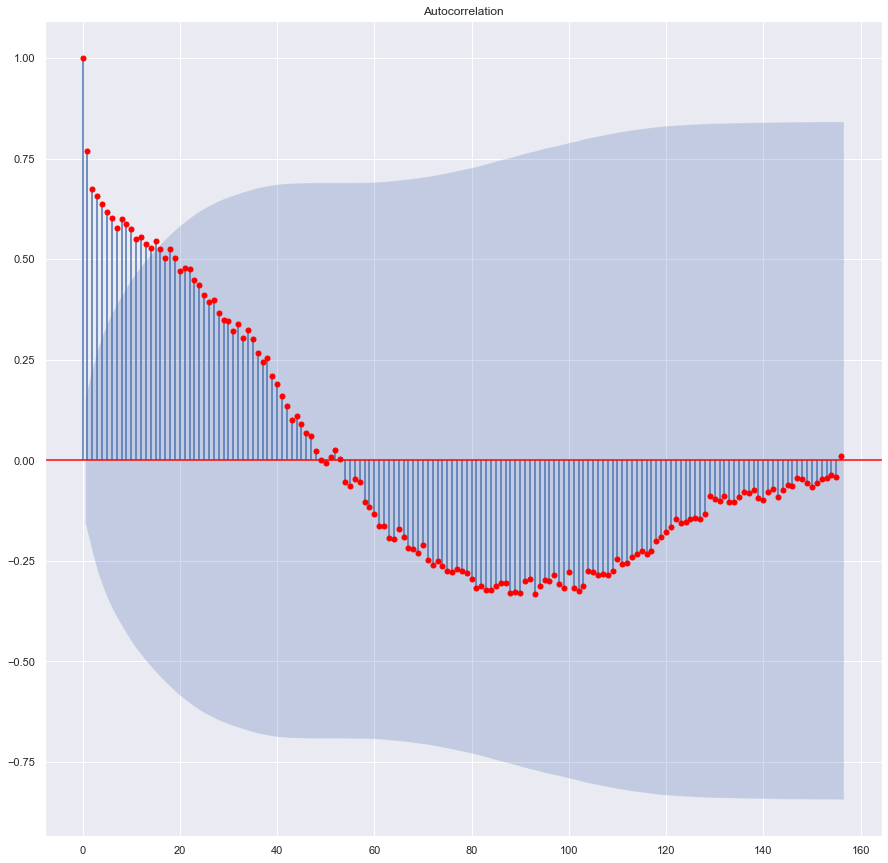

In [412]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sema_m.cantidad_pasos, lags = nlags, color='red')
plt.show()

Lo que nos deja el gráfico de autocorrelación es que tenemos 16 rezagos que estan por fuera de las bandas de confianza, lo cual nos dice que la media movil podría presentar esta cantidad de rezagos.

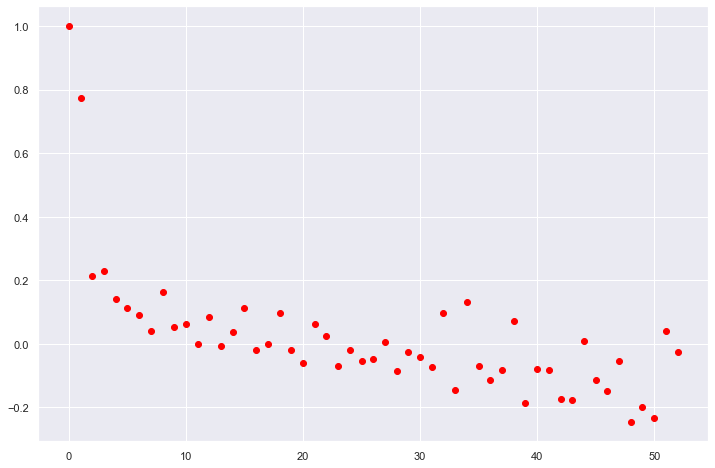

In [413]:
from statsmodels.tsa.stattools import pacf

Nlags= 52
pautoc= pacf(sema_m.cantidad_pasos, nlags= Nlags)
pautoc.shape

plt.figure(figsize=(12,8))
plt.scatter(np.arange(Nlags+1), pautoc, color='red')
plt.show()

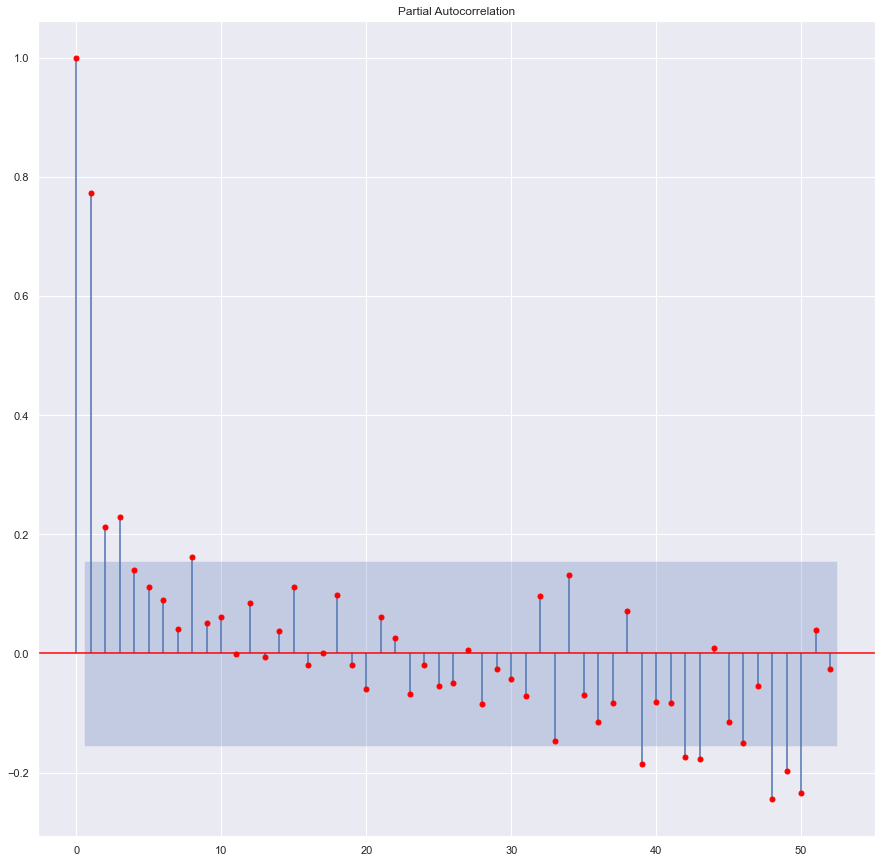

In [414]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sema_m.cantidad_pasos, lags = Nlags, color='red')
plt.show()

La autocorrelación parcial nos da como resultado que nuestra serie tendría un proceso Autoregresivo de 3.

Lo que nos dejaría un proceso de AR (proceso Autoregresivo) de 3, y las MA (medias moviles) de 16.

## Modelos Predictivos.

Empezaremos con el modelo Benchmark de regresión lineal simple para predecir el último trimestre de 2019, para ver que tan bien podemos predecir el primer trimestre del 2020.

Vamos a utilizar la metrica de RMSE y como primer paso haremos una prueba en nuestro Benchmark, nuestros datos de salida van a ser el último trimestre del año 2019 y nuestros datos de entrada usaremos el trimestre previo de este año.

In [415]:
from sklearn.metrics import mean_squared_error

In [416]:
# Trimestre para X
xi = '2019-07-01'
xf= '2019-09-30'
x= sema_m[(sema_m.index>=xi)&(sema_m.index<=xf)]

# Trimestre a predecir para Y
yi= '2019-10-01'
yf= '2019-12-31'
Y= sema_m[(sema_m.index>=yi)&(sema_m.index<=yf)]


In [417]:
yt=x.cantidad_pasos.rolling(window=1, center=True).mean()
b_err=np.sqrt(mean_squared_error(Y,yt))
print('RMSE en Benchmark: ', b_err)

RMSE en Benchmark:  2999.8287232635216


Se realizó un Benchmark simple con el método rolling de Pandas y fijando una sola ventana. Es un modelo simple pero me ayuda a tener una base para desarrollar modelos más complejos a partir de esto.

Dicho esto, pasaré a graficar el resultado predicho y los valores originales del set.

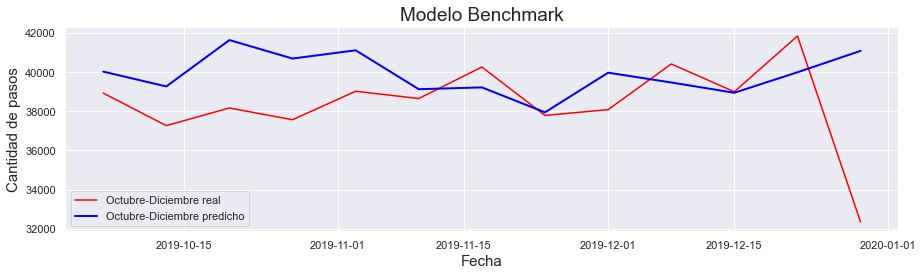

In [418]:
plt.figure(figsize=(13,4))
plt.plot(Y.index, Y.cantidad_pasos, color='red', label='Octubre-Diciembre real')
plt.plot(Y.index, yt, lw=2, color='blue', label='Octubre-Diciembre predicho')
plt.title('Modelo Benchmark', size= 19)
plt.xlabel('Fecha', size= 15)
plt.ylabel('Cantidad de pasos', size= 15)
plt.legend()
plt.tight_layout()
plt.show()

Podemos ver que los datos reales, al no tener registros del año 2020 tienen una curva muy pronunciada.
Ahora bien, mirando la predicción del modelo, vemos que para el inicio del 2020 se comporta de igual manera a como venia la tendencia anteriormente, con un incremento de pasos en cada principio de año. Podemos deducir que por más que nuestro modelo sólo tomó datos de medio año, predijo correctamente lo que veníamos viendo con el dataset original. Es una buena señal para seguir adelante.

Ahora voy a preparar mis datos, para esto tomé la decisión de tomar semanas enteras, cortando la primera semana del año 2017 y los últimos días del 2019 para eliminar así las pendientes que veníamos observando tanto en el inicio como en el fin de los gráficos del set.

In [419]:
sema_m = sema_m[(sema_m.index >='2017-01-08')&(sema_m.index<='2019-12-29')]
sema_m

cantidad_pasos
fecha                     
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
2017-02-05    51343.000000
...                    ...
2019-12-01    38079.285714
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571

[156 rows x 1 columns]

Nos quedamos con el set de 156 semanas para poder seguir trabajando.

In [420]:
sen = sema_m.cantidad_pasos
sen.shape

(156,)

A continuación definiremos el look_back, para indicar cuantos pasos atrás retrocederemos para realizar la predicción siguiente.

In [421]:
lb= 15

In [422]:
n = sen.shape[0]
X = np.zeros((n - lb - 1,lb))
y = np.zeros(n - lb - 1)
print(X.shape, y.shape)

(140, 15) (140,)


In [423]:
for i in range(X.shape[0]):
    X[i,:] = sen.iloc[i:i+lb]
    y[i] = sen.iloc[i+lb]

In [424]:
print(X)
print('---------------------------')
print(y)

[[49601.71428571 52344.71428571 51030.71428571 ... 47613.85714286
  48639.57142857 43558.85714286]
 [52344.71428571 51030.71428571 50654.42857143 ... 48639.57142857
  43558.85714286 48889.28571429]
 [51030.71428571 50654.42857143 51343.         ... 43558.85714286
  48889.28571429 50135.14285714]
 ...
 [37942.         39967.85714286 39467.28571429 ... 40255.71428571
  37785.71428571 38079.28571429]
 [39967.85714286 39467.28571429 38941.71428571 ... 37785.71428571
  38079.28571429 40413.        ]
 [39467.28571429 38941.71428571 39989.57142857 ... 38079.28571429
  40413.         38994.28571429]]
---------------------------
[48889.28571429 50135.14285714 46553.57142857 44153.14285714
 46320.         43864.85714286 45705.28571429 47878.14285714
 46874.57142857 45235.85714286 47985.71428571 46165.57142857
 49681.42857143 51022.28571429 48891.42857143 49309.14285714
 47749.28571429 48177.57142857 45283.85714286 48237.
 48276.14285714 53502.85714286 50571.28571429 51095.85714286
 52845.4285714

Definicas las X e y, pasaremos al Train Test Split.

In [425]:
N_train = 145 - lb # cantidad de instancias que vamos a usar para entrenar. 
N_test = 10 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + lb

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(130, 15) (130,)
(10, 15) (10,)


In [426]:
y_test = y[N_train:N_train+N_test]
print(y_test)

[38163.85714286 37564.28571429 39018.42857143 38648.
 40255.71428571 37785.71428571 38079.28571429 40413.
 38994.28571429 41840.14285714]


## XGBoost

Comenzaremos empleando el modelo de XGBoost y con su debida optimización de hiperparámetros.

In [427]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import  GridSearchCV, TimeSeriesSplit
from sklearn.model_selection import cross_val_score
ts=TimeSeriesSplit(n_splits=2)

In [428]:
xgb=XGBRegressor(random_state= 42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [429]:
testxp= xgb.predict(X_test)
trainxp=xgb.predict(X_train)

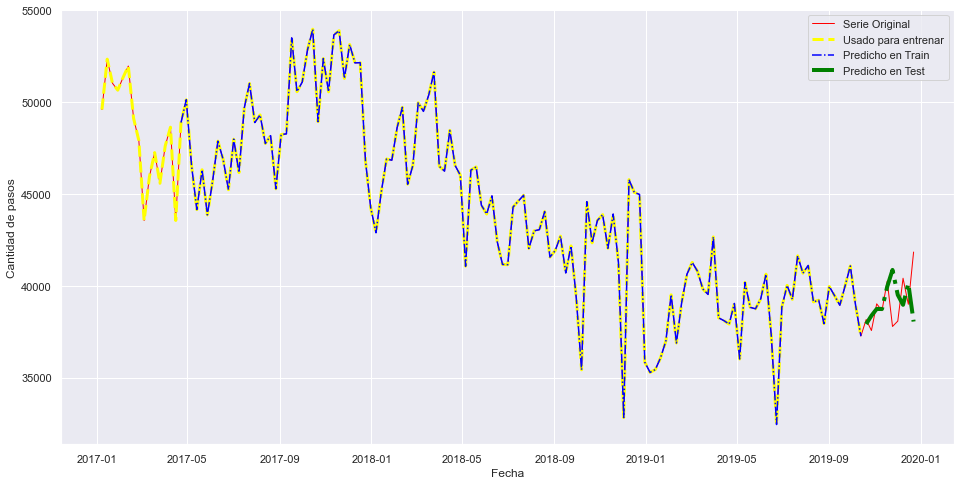

RMSE XGB en Train: 0.07978924935395143
RMSE XGB en Test: 1734.7105779765925


In [430]:
plt.figure(figsize=(16,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainxp,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testxp,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainxp))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testxp))
print('RMSE XGB en Test:',rmse)

## Optimización de hiperparámetros para XGBoost.

In [431]:
# param_xgb={'n_estimators':[15, 25, 50, 100, 150, 200],
#            'max_depth': [4,6,8,10],
#            'learning_rate': [0.1,0.2,0.3,0.4],
#            'colsample_bytree ': [0.3,0.5,0.7,1],
#            'subsample': [0.3,0.5,0.7,0.9,1],
#            'reg_lambda': [1,2,3],
#            'n_thread': [4]}

In [432]:
# model1= GridSearchCV(xgb, param_grid= param_xgb, cv=ts, n_jobs=-2)

In [433]:
# model1.fit(X_train,y_train)

In [434]:
# print("Mejores parametros: "+str(model1.best_params_))

In [435]:
#Mejores parametros: {'colsample_bytree ': 0.3, 'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 50, 'n_thread': 4, 'reg_lambda': 3, 'subsample': 0.3}

Aquí debajo se colocaron los hiperparámetros arrojados por el GridSearchCV, que se desarrollaron en las línes de código anteriores.
No se lograron resultados que mejoren nuestro modelo.

In [436]:
xgb_op= XGBRegressor(colsample_bytree=0.3, learning_rate=0.4, max_depth=4, n_estimators=50, n_thread=4, reg_lambda=3, subsample=0.3, random_state=42)

In [437]:
xgb_op.fit(X_train, y_train)

[19:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, n_thread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=3, scale_pos_weight=1,
             subsample=0.3, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [438]:
testxp1= xgb_op.predict(X_test)
trainxp1=xgb_op.predict(X_train)

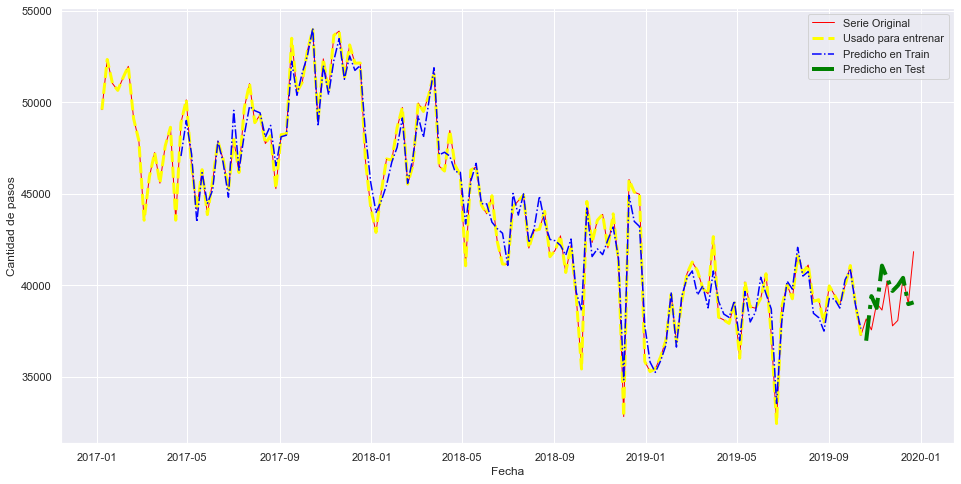

RMSE XGB en Train: 903.8097654214763
RMSE XGB en Test: 1604.7000735234192


In [439]:
plt.figure(figsize=(16,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainxp1,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testxp1,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainxp1))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testxp1))
print('RMSE XGB en Test:',rmse)

Vamos a buscar un mejor modelo ajustando los hiperparámetros a mano.

In [440]:
xgb_m= XGBRegressor(colsample_bytree= 0.3, learning_rate=0.1, n_estimators=50, n_thread=4, subsample=0.5, reg_lambda=0.5, max_depth=4, random_state=42)

xgb_m.fit(X_train, y_train)

[19:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, n_thread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1,
             subsample=0.5, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [441]:
testxp2= xgb_m.predict(X_test)
trainxp2=xgb_m.predict(X_train)

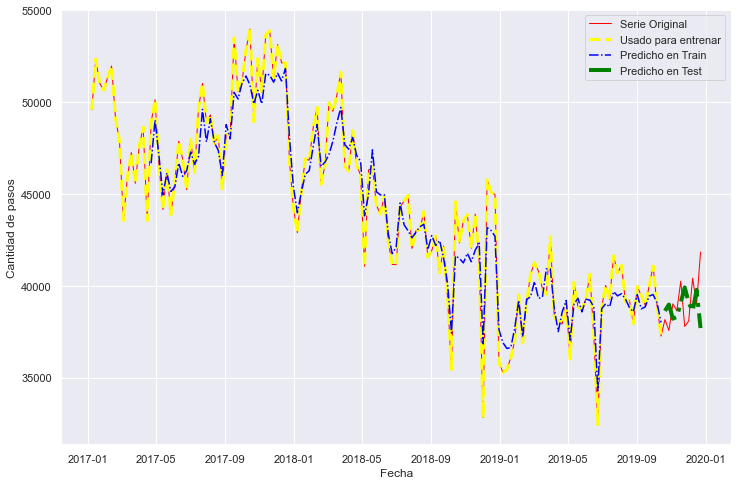

RMSE XGB en Train: 1301.7434845523678
RMSE XGB en Test: 1756.8336901598157


In [442]:
plt.figure(figsize=(12,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainxp2,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testxp2,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainxp2))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testxp2))
print('RMSE XGB en Test:',rmse)

Luego de varias pruebas manuales en los hiperparámetros, puedo concluír que le XGBoost no es el mejor modelo para realizar este proyecto.
Se realizaron varias pruebas, se buscó los mejores hiperparámetros pero no se llegó a bajar el error considerablemente. 
Comparando con el modelo Benchmark, si podríamos decir que mejoró en un 50% aproximadamente. Pero no estoy satisfecho.

A continuación veremos las variables (semanas), que más importancia tienen para este modelo.

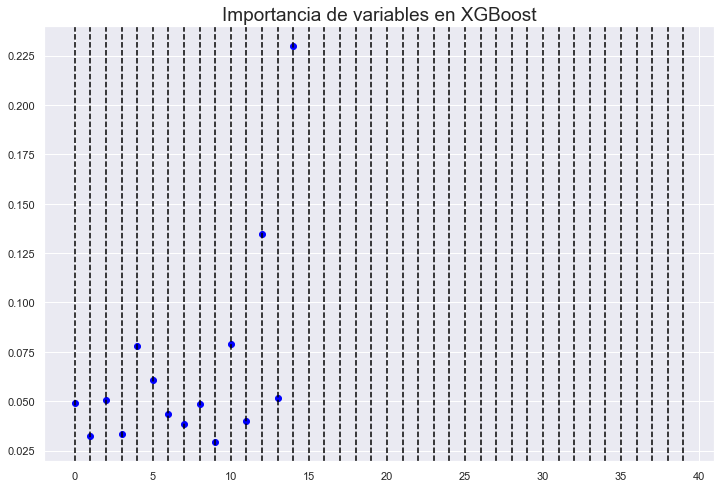

In [443]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(xgb_op.feature_importances_.size), xgb_op.feature_importances_, color='Blue')
plt.title('Importancia de variables en XGBoost', size= 19)
for x in range(40): # Veremos solamente 40 semanas para que el gráfico sea mas legible 
    plt.axvline(x, linestyle= '--', color='black')
plt.show()

Vemos que el XGBoost toma como semana más importante la nro 14, con un casi 25% siendo esta la semana más importante para nuestros datos de salida.

## Random Forest Regressor.

In [444]:
from sklearn.ensemble import RandomForestRegressor

In [445]:
rfg = RandomForestRegressor(random_state=42)
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [446]:
testrp = rfg.predict(X_test)
trainrp = rfg.predict(X_train)

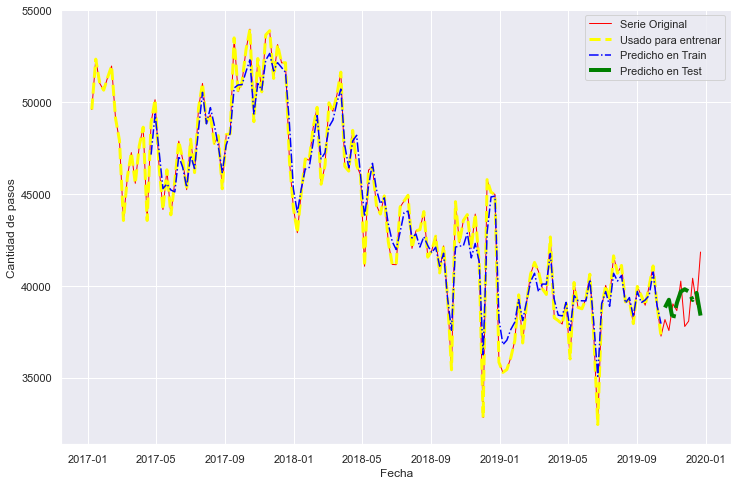

RMSE XGB en Train: 1035.8303979278712
RMSE XGB en Test: 1581.9230101798648


In [447]:
plt.figure(figsize=(12,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainrp,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testrp,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainrp))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testrp))
print('RMSE XGB en Test:',rmse)

La primera impresión del Random Forest, al correrlo sin ajustar ningún hiperparámetro podemos ver que funciona mejor que el XGBoost hasta el momento obteniendo un error más bajo.

Realizamos el GridSearch para este modelo.

In [448]:
# param_rfg = {'n_estimators':[ 20, 50,100,200],
#               'max_depth': [i for i in range(2,20)],
#               'max_features': ['auto', 'sqrt', 'log2'], 
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4, 6]} 

In [449]:
# model2 = GridSearchCV(rfg, param_grid= param_rfg, n_jobs=-2, cv=ts)

In [450]:
# model2.fit(X_train, y_train)

In [451]:
# print("Mejores parametros: "+str(model2.best_params_))
# print("Mejor Score: "+str(model2.best_score_)+'\n')

In [452]:
# Mejores parametros: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [453]:
rfg_op = RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, n_jobs=-2)

In [454]:
rfg_op.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=50,
                      n_jobs=-2, random_state=42)

In [455]:
testrp1 = rfg_op.predict(X_test)
trainrp1= rfg_op.predict(X_train)

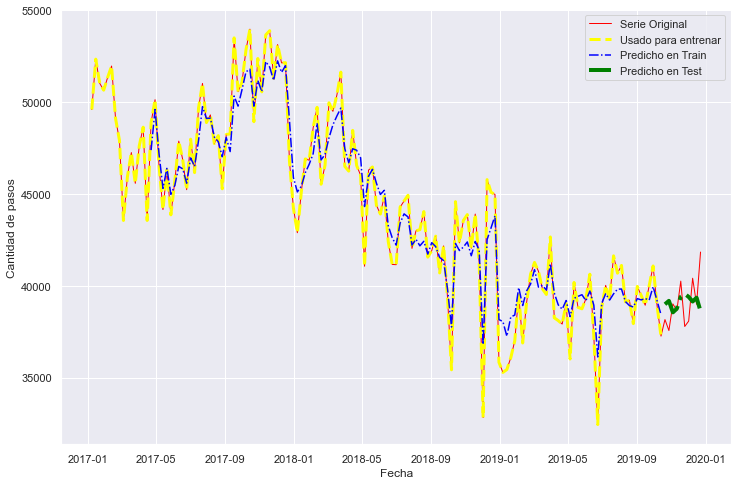

RMSE XGB en Train: 1304.8618345626455
RMSE XGB en Test: 1458.1642755116648


In [456]:
plt.figure(figsize=(12,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainrp1,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testrp1,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainrp1))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testrp1))
print('RMSE XGB en Test:',rmse)

Utilizando los parámetros del GridSearch vemos que el modelo empeora comparando con el primero de RandomForest donde no se aplicaron hiperparámetros, voy a realizar nuevamente una busqueda manual para buscar un mejor funcionamiento del modelo.

Mejores parametros: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [457]:
rf_m = RandomForestRegressor(max_depth= 8, max_features='auto', min_samples_split= 3, n_estimators= 100, min_samples_leaf= 3)
rf_m.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3)

In [458]:
testrp2= rf_m.predict(X_test)
trainrp2= rf_m.predict(X_train)

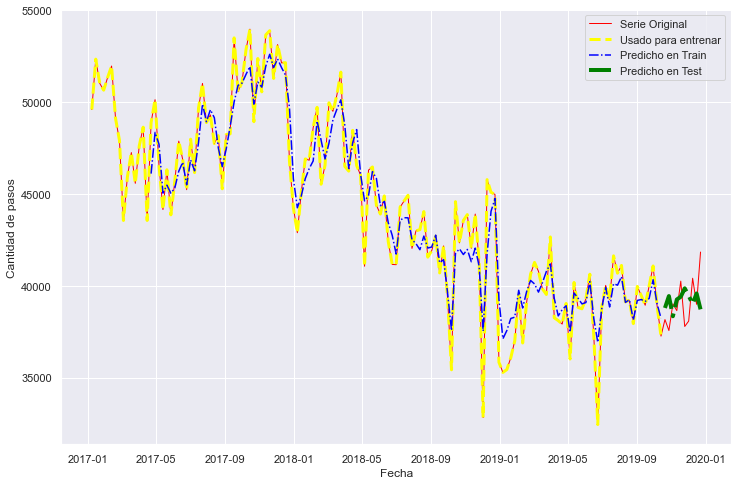

RMSE XGB en Train: 1407.0203821401576
RMSE XGB en Test: 1541.5010065237989


In [459]:
plt.figure(figsize=(12,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainrp2,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testrp2,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainrp2))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testrp2))
print('RMSE XGB en Test:',rmse)

Con la búsqueda manual tampoco se tuvo éxito y el modelo se comportó de manera similar o peor que el arrojado por el GrdiSearch. Por lo cual podemos decir que este modelo, al igual que el XGBoost, no se adapta bien para nuestros datos.
A continuación realizaré el gráfico con la importancia de las variables para ver que comportamiento adopto el RandomForest, lo correré con el modelo sin optimizar que fue el que mejor comportamiento tuvo.

Y una vez hecho esto pasaré a realizar el modelo ARIMA, específico para este tipo de problema de serie temporal.

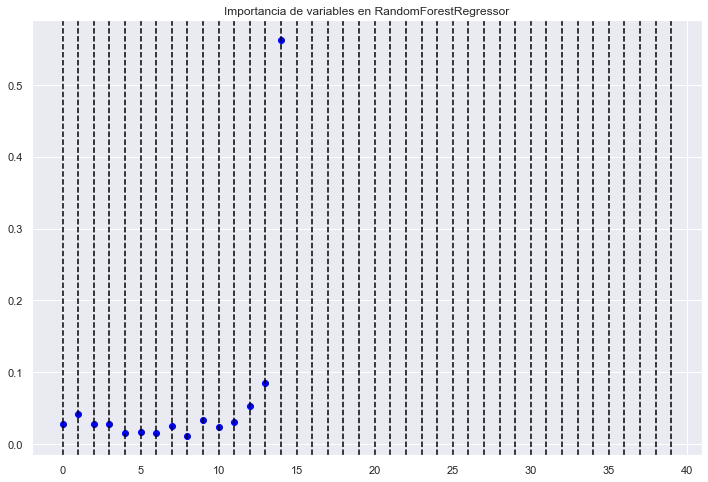

In [460]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(rfg.feature_importances_.size), rfg.feature_importances_, color='Blue')
plt.title('Importancia de variables en RandomForestRegressor')
for x in range(40): # Veremos solamente 40 semanas para que el gráfico sea mas legible 
    plt.axvline(x, linestyle= '--', color='black')
plt.show()

Vemos que el modelo toma como variable más importante la semana 14, al igual que el modelo anterior pero en este caso le da más del doble de importancia para predecir.

## Modelo ARIMA.

Voy a utilizar el ARIMA (Modelo autorregresivo integrado de media móvil) este modelo es el que mejor se adecua para este tipo de trabajos. 

Para comenzar pasaré a explicar los 3 componentes, p, d, q.

p = La p es el orden del modelo autorregresivo. (Recordar, AR=3)

d = El grado de diferenciación (número de veces que se diferencia)

q = Es el orden del proceso de la media movil.(Recordar, MA=16)


In [461]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
from tqdm import tqdm_notebook

Elijo el método SARIMAX(promedios móviles integrados autorregresivos estacionales con regresores exógenos) de Python.

In [462]:
y = sema_m
y.head()

cantidad_pasos
fecha                     
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
2017-02-05    51343.000000

A continuación voy a crear una lista con las posibles combinaciones de los parámetros.
 

In [463]:
d=range(0,3)
p=q=range(7,16)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(7, 0, 8) x (7, 0, 8, 12)
SARIMAX:(7, 0, 8) x (7, 0, 9, 12)
SARIMAX:(7, 0, 9) x (7, 0, 10, 12)
SARIMAX:(7, 0, 9) x (7, 0, 11, 12)


In [464]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod=sm.tsa.statespace.SARIMAX (y,
#                                            order= param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#             results=mod.fit()
            
#             print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
#         except:
#             continue

Esta celda se corrió por aproximadamente 15 horas. Se buscó encontrar el AIC más bajo combinando todos los parámetros antes definidos.

Por problemas de temperatura en el CPU se interrumpió el kernel, aquí debajo dejé los mejores resultados arrojados.     A continuación voy a buscar estos parámetros a mano para encontrar un valor mejor.

SARIMAX(7, 1, 8)x(9, 2, 11, 12) - AIC:72.0
SARIMAX(7, 1, 8)x(9, 2, 12, 12) - AIC:74.0   

SARIMAX(7, 1, 8)x(9, 2, 13, 12) - AIC:76.0
SARIMAX(7, 1, 8)x(10, 0, 13, 12) - AIC:78.0

SARIMAX(7, 1, 8)x(10, 1, 10, 12) - AIC:327.9986731585154
SARIMAX(7, 1, 8)x(10, 1, 11, 12) AIC:110.53840438603251

SARIMAX(7, 1, 8)x(10, 1, 12, 12) - AIC:76.0
SARIMAX(7, 1, 8)x(10, 1, 13, 12) - AIC:78.0

SARIMAX(7, 1, 8)x(10, 2, 7, 12) - AIC:143.45942338333276
SARIMAX(7, 1, 8)x(10, 2, 8, 12) - AIC:145.45930249404876

SARIMAX(7, 1, 8)x(10, 2, 9, 12) - AIC:147.45930396230034
SARIMAX(7, 1, 8)x(10, 2, 10, 12) - AIC:110.72968482941012

SARIMAX(7, 1, 8)x(10, 2, 11, 12) - AIC:74.0
SARIMAX(7, 1, 8)x(10, 2, 12, 12) - AIC:76.0

SARIMAX(7, 1, 8)x(10, 2, 13, 12) - AIC:78.0
SARIMAX(7, 1, 8)x(11, 0, 11, 12) - AIC:321.8118490239995

SARIMAX(7, 1, 8)x(11, 0, 12, 12) - AIC:113.10049144932462
SARIMAX(7, 1, 8)x(11, 0, 13, 12) - AIC:80.0

SARIMAX(7, 1, 8)x(11, 1, 7, 12) - AIC:141.07640571970592
SARIMAX(7, 1, 8)x(11, 1, 10, 12) - AIC:147.07645247502865

SARIMAX(7, 1, 8)x(11, 1, 11, 12) - AIC:112.5385044576056
SARIMAX(7, 1, 8)x(11, 1, 12, 12) - AIC:78.0

SARIMAX(7, 1, 8)x(11, 1, 13, 12) - AIC:80.0
SARIMAX(7, 1, 8)x(11, 2, 7, 12) - AIC:68.0

SARIMAX(7, 1, 8)x(11, 2, 8, 12) - AIC:70.0
SARIMAX(7, 1, 8)x(11, 2, 9, 12) - AIC:72.0

SARIMAX(7, 1, 8)x(11, 2, 10, 12) - AIC:74.0
SARIMAX(7, 1, 8)x(11, 2, 11, 12) - AIC:76.0

SARIMAX(7, 1, 8)x(11, 2, 12, 12) - AIC:78.0
SARIMAX(7, 1, 8)x(11, 2, 13, 12) - AIC:80.0

SARIMAX(7, 1, 8)x(12, 0, 12, 12) - AIC:115.10092205035038
SARIMAX(7, 1, 8)x(12, 0, 13, 12) - AIC:82.0

SARIMAX(7, 1, 8)x(12, 1, 7, 12) - AIC:70.0
SARIMAX(7, 1, 8)x(12, 1, 8, 12) - AIC:72.0

SARIMAX(7, 1, 8)x(12, 1, 9, 12) - AIC:74.0
SARIMAX(7, 1, 8)x(12, 1, 10, 12) - AIC:76.0

SARIMAX(7, 1, 8)x(12, 1, 11, 12) - AIC:78.0
SARIMAX(7, 1, 8)x(12, 1, 12, 12) - AIC:80.0

SARIMAX(7, 1, 8)x(12, 1, 13, 12) - AIC:82.0
SARIMAX(7, 1, 8)x(12, 2, 7, 12) - AIC:70.0

SARIMAX(7, 1, 8)x(12, 2, 8, 12) - AIC:72.0
SARIMAX(7, 1, 8)x(12, 2, 9, 12) - AIC:74.0

SARIMAX(7, 1, 8)x(12, 2, 10, 12) - AIC:76.0
SARIMAX(7, 1, 8)x(12, 2, 11, 12) - AIC:78.0

SARIMAX(7, 1, 8)x(12, 2, 12, 12) - AIC:80.0
SARIMAX(7, 1, 8)x(12, 2, 13, 12) - AIC:82.0

SARIMAX(7, 1, 8)x(13, 0, 7, 12) - AIC:72.0
SARIMAX(7, 1, 8)x(13, 0, 8, 12) - AIC:74.0

SARIMAX(7, 1, 8)x(13, 0, 9, 12) - AIC:76.0
SARIMAX(7, 1, 8)x(13, 0, 10, 12) - AIC:78.0

SARIMAX(7, 1, 8)x(13, 0, 11, 12) - AIC:80.0
SARIMAX(7, 1, 8)x(13, 0, 12, 12) - AIC:82.0

SARIMAX(7, 1, 8)x(13, 0, 13, 12) - AIC:84.0
SARIMAX(7, 1, 8)x(13, 1, 7, 12) - AIC:72.0

SARIMAX(7, 1, 8)x(13, 1, 8, 12) - AIC:74.0
SARIMAX(7, 1, 8)x(13, 1, 9, 12) - AIC:76.0

SARIMAX(7, 1, 8)x(13, 1, 10, 12) - AIC:78.0
SARIMAX(7, 1, 8)x(13, 1, 11, 12) - AIC:80.0

SARIMAX(7, 1, 8)x(13, 1, 12, 12) - AIC:82.0
SARIMAX(7, 1, 8)x(13, 1, 13, 12) - AIC:84.0

SARIMAX(7, 1, 8)x(13, 2, 7, 12) - AIC:72.0
SARIMAX(7, 1, 8)x(13, 2, 8, 12) - AIC:74.0

SARIMAX(7, 1, 8)x(13, 2, 9, 12) - AIC:76.0
SARIMAX(7, 1, 8)x(13, 2, 10, 12) - AIC:78.0

SARIMAX(7, 1, 8)x(13, 2, 11, 12) - AIC:80.0
SARIMAX(7, 1, 8)x(13, 2, 12, 12) - AIC:82.0

SARIMAX(7, 1, 8)x(13, 2, 13, 12) - AIC:84.0
SARIMAX(7, 1, 9)x(7, 0, 11, 12) - AIC:298.02441469533755

SARIMAX(7, 1, 9)x(7, 0, 12, 12) - AIC:89.51823581645802
SARIMAX(7, 1, 9)x(7, 0, 13, 12) - AIC:74.0

SARIMAX(7, 1, 9)x(7, 2, 10, 12) - AIC:87.34978373036427
SARIMAX(7, 1, 9)x(7, 2, 11, 12) - AIC:70.0

SARIMAX(7, 1, 9)x(7, 2, 12, 12) - AIC:72.0
SARIMAX(7, 1, 9)x(7, 2, 13, 12) - AIC:74.0

SARIMAX(7, 1, 9)x(8, 1, 10, 12) - AIC:307.2955954029468
SARIMAX(7, 1, 9)x(8, 1, 11, 12) - AIC:90.2504529238289

SARIMAX(7, 1, 9)x(8, 1, 12, 12) - AIC:74.0
SARIMAX(7, 1, 9)x(8, 1, 13, 12) - AIC:76.0

SARIMAX(7, 1, 9)x(8, 2, 9, 12) - AIC:319.5490951107448
SARIMAX(7, 1, 9)x(8, 2, 10, 12) - AIC:89.34980405232619

SARIMAX(7, 1, 9)x(8, 2, 11, 12) - AIC:72.0
SARIMAX(7, 1, 9)x(8, 2, 12, 12) - AIC:74.0

SARIMAX(7, 1, 9)x(8, 2, 13, 12) - AIC:76.0
SARIMAX(7, 1, 9)x(9, 0, 11, 12) - AIC:301.8455148348668

SARIMAX(7, 1, 9)x(9, 0, 12, 12) - AIC:93.51820300030089
SARIMAX(7, 1, 9)x(9, 0, 13, 12) - AIC:78.0

SARIMAX(7, 1, 9)x(9, 1, 9, 12) - AIC:527.8440709197121
SARIMAX(7, 1, 9)x(9, 1, 12, 12) - AIC:76.0

SARIMAX(7, 1, 9)x(9, 1, 13, 12) - AIC:78.0

In [465]:
y= sema_m.cantidad_pasos
model = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 8),
                                seasonal_order=(10, 1, 8, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado = model.fit()

print(resultado.summary())

C:\Users\Nico\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
                                      SARIMAX Results                                       
Dep. Variable:                       cantidad_pasos   No. Observations:                  156
Model:             SARIMAX(10, 1, 8)x(10, 1, 8, 12)   Log Likelihood                -118.559
Date:                              Sat, 27 Feb 2021   AIC                            311.117
Time:                                      19:54:11   BIC                            332.020
Sample:                                  01-08-2017   HQIC                           306.821
                                       - 12-29-2019                                         
Covariance Type:                                opg                                         
                 coef    std err

Se realizaron varias pruebas llegan hasta esta combinación la cual me dejo conforme.
Ahora bien, vamos a ver específicamente las columnas de coeff (coeficiente) y p>|z|.
La columna coef nos da la importancia de cada característica y como afecta en la serie temporal. Y la columna de p>|z| nos da la importancia de cada característica.

A continuación vemos el gráfico de residuos, vemos que la media esta en 0 lo que nos dice que nuestro ruido blanco, es aleatorio y no tiene correlación, lo cual es lo que buscamos.

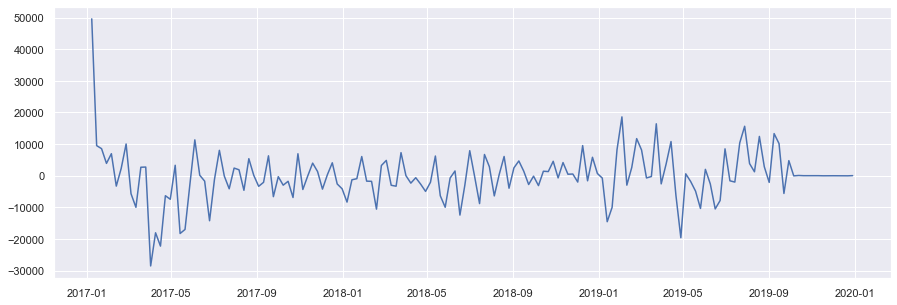

In [466]:
plt.figure(figsize=(15,5))
plt.plot(resultado.resid)
plt.show()

Lo que se busca corroborar en el gráfico anterior es que los errores no tengan una correlación, y que la media y su distribución sea 0.

* En el primer gráfico vemos el residuo estandarizado a lo largo del tiempo con la media en 0.
* En el segundo vemos que el KDE y el N(0,1) tienen una distribución similar, lo que indica que la distribución de los errores es 0.
* En el tercer gráfico se obseva un comportamiento lineal, lo que avala el gráfico anterior en el N(0,1).
* En el último gráfico vemos la autocorrelación, la que nos dice que no hay un parecido entre los rezagos de sí mismo.

Ahora que tenemos un modelo adecuado, vamos a realizar una predicción para el último trimestre del 2019 para corroborar que tan bueno es el modelo y una vez finalizado este paso pasaremos a predecir el año 2020 que es el que nos interesa.

Primeramente haremos la predicción con en el dataset completo, y luego con los datos del 2019 solamente para ver como se comporta de ambas formas.
Vamos a predecir el último trimestre del 2019 tomando en cuenta desde el 6 de Octubre del 2019, porque es el primer lunes del ese mes.

## Sarimax One-Step año 2019

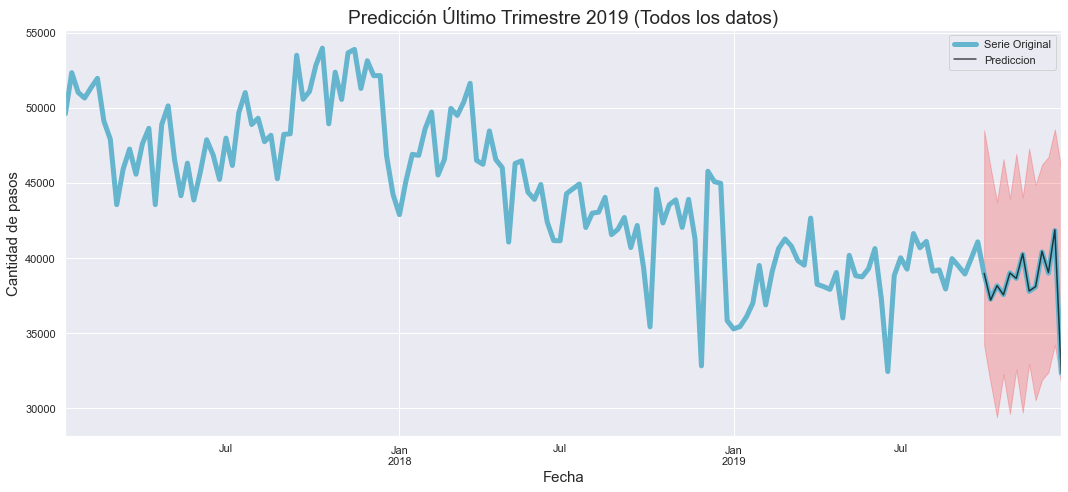

In [467]:
pred = resultado.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
c_pred = pred.conf_int()
ax = y['2017':].plot(label='Serie Original',color='c',lw = 5,figsize=(15,7))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='Black')

ax.fill_between(c_pred.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title("Predicción Último Trimestre 2019 (Todos los datos)", fontsize=19)
plt.xlabel('Fecha',size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

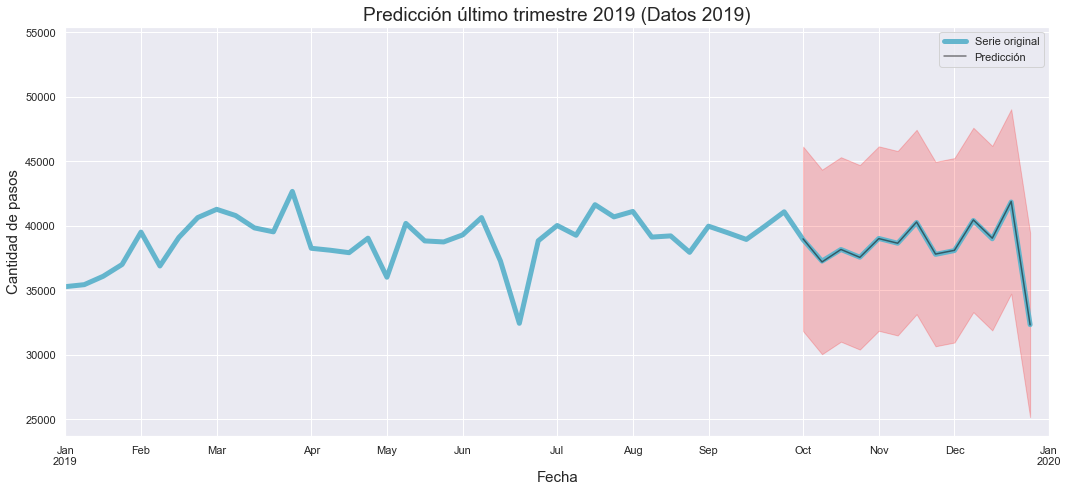

In [468]:
pred = resultado.get_prediction(start= datetime.datetime(2019, 10, 6), dynamic= False) # Dynamic en False es para One-Step
c_pred = pred.conf_int()

ax= y['2017': ].plot(label='Serie original', color= 'c', lw=5, figsize=(15,7))

pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=0.5, color='Black')

ax.fill_between(c_pred.index,
                c_pred.iloc[:,0],
                c_pred.iloc[:,1], color='red', alpha=0.2)
plt.title('Predicción último trimestre 2019 (Datos 2019)', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.xlim(datetime.datetime(2019,1,1), datetime.datetime(2019, 12, 31))
plt.legend()
plt.tight_layout()
plt.show()

Observamos que nuestro modelo es muy bueno prediciendo con el One Step, vemos que la predicción coincide muy bien con los datos reales.

Veamos abajo el RMSE.

In [469]:
y_predf = pred.predicted_mean
y_real = y['2019-10-06':]

error_one = np.sqrt(mean_squared_error(y_predf, y_real))
print('RMSE de One Step 2019: ', error_one)

RMSE de One Step 2019:  34.72241301742034


Tenemos un Error de 34,7 lo cual es excelente ya que es muy bajo y pudimos ver que nuestro modelo predice correctamente según lo graficado antes.

## SARIMAX Multi-Step año 2019

Vamos a realizar de la misma forma.

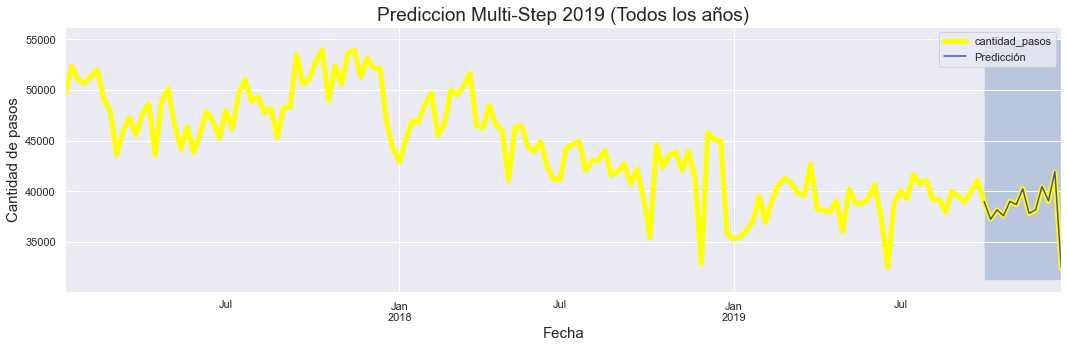

In [470]:
pred_m = resultado.get_prediction(start=datetime.datetime(2019, 10, 6), dynamic=True, full_results=True)
c_pred_m = pred_m.conf_int()

ax=y['2017':].plot(color='yellow', lw=5, figsize=(15,5))
pred_m.predicted_mean.plot(ax= ax, label='Predicción', alpha=0.7, figsize=(15,5), color='Blue')

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,10,6), y.index[-1], alpha=0.3, zorder=-1)

plt.title('Prediccion Multi-Step 2019 (Todos los años)', size= 19)
plt.xlabel('Fecha', size= 15)
plt.ylabel('Cantidad de pasos', size= 15)

plt.legend()
plt.tight_layout()
plt.show()

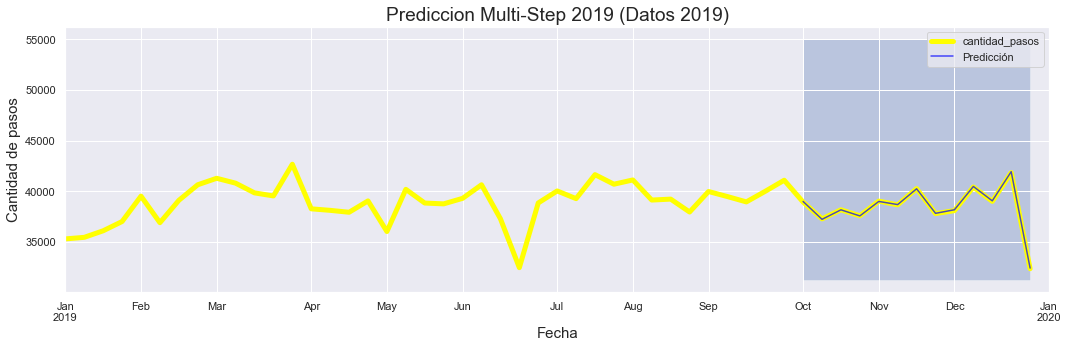

In [471]:
pred_m = resultado.get_prediction(start=datetime.datetime(2019, 10, 6), dynamic=True, full_results=True)
c_pred_m = pred_m.conf_int()

ax=y['2017':].plot(color='yellow', lw=5, figsize=(15,5))
pred_m.predicted_mean.plot(ax= ax, label='Predicción', alpha=0.7, figsize=(15,5), color='Blue')

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,10,6), y.index[-1], alpha=0.3, zorder=-1)

plt.title('Prediccion Multi-Step 2019 (Datos 2019)', size= 19)
plt.xlabel('Fecha', size= 15)
plt.ylabel('Cantidad de pasos', size= 15)
plt.xlim(datetime.datetime(2019,1,1), datetime.datetime(2019,12,31))
plt.legend()
plt.tight_layout()
plt.show()

En el gráfico vemos que el Multi-Step también predice correctamente nuestros datos.

Veamos el RMSE para este modelo.


In [472]:
y_predf1 = pred_m.predicted_mean
y_real1 = y['2019-10-6':]

error_mul = np.sqrt(mean_squared_error(y_predf1, y_real1))
print('RMSE para Multi-Step: ', error_mul)

RMSE para Multi-Step:  50.03183884844027


Vemos que el RMSE es más alto que en el One Step. A causa de esto vamos a utilizar el modelo de One-Step para trabajar en las predicciones para el año 2020.

## Predicción para el Año 2020

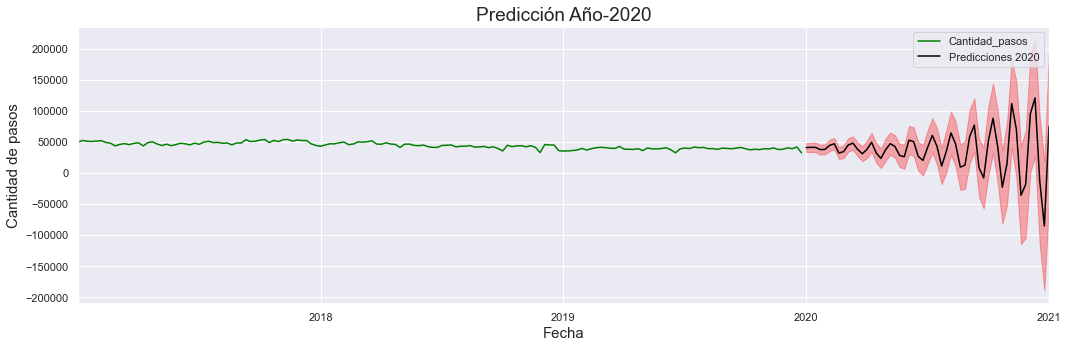

In [473]:
pred_f = resultado.get_forecast(steps=datetime.datetime(2020,12,31))
c_predf = pred_f.conf_int()

ax = y.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_f.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='Black')
ax.fill_between(c_predf.index,
                c_predf.iloc[:, 0],
                c_predf.iloc[:, 1], color='red', alpha=.3)
plt.title("Predicción Año-2020", fontsize=19)
ax.set_xlabel('Fecha', size=15)
ax.set_ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

Vamos a realizar un gráfico desde el último trimestre del 2020 para poder apreciar mejor el año 2020.

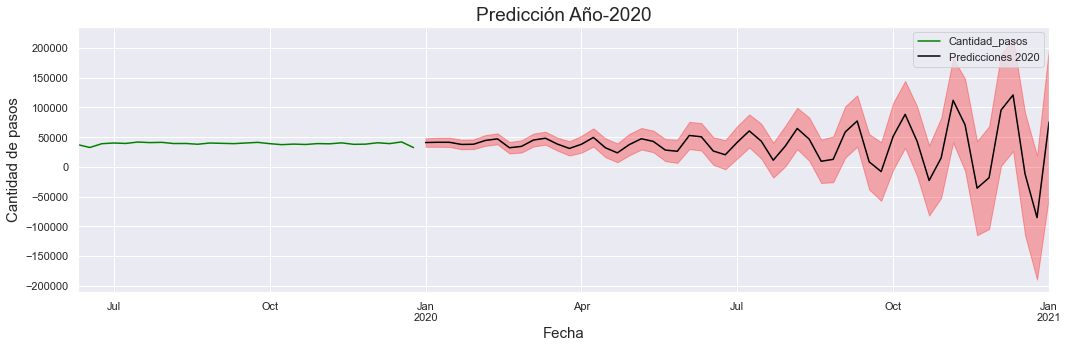

In [474]:
pred_f = resultado.get_forecast(steps=datetime.datetime(2020,12,31))
c_predf = pred_f.conf_int()

ax = y.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_f.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='Black')
ax.fill_between(c_predf.index,
                c_predf.iloc[:, 0],
                c_predf.iloc[:, 1], color='red', alpha=.3)
plt.xlim(datetime.datetime(2019,6,10), datetime.datetime(2020,12,31))
plt.title("Predicción Año-2020", fontsize=19)
ax.set_xlabel('Fecha', size=15)
ax.set_ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

Observamos que en Abril del 2020 nuestro modelo empieza a variar mas bruscamente, esto se debe a los intervalos de confianza, que se hacen cada vez mas grandes con el paso del tiempo.

## Conclusiones Finales

Viendo los resultados finales, respetando las consignas propuestas, vemos que el modelo falla pero porque sabemos que el año 2020 fue un año atípico con una pandemia en medio y una cuarentena de aproximadamente 50 días, podríamos tomar hasta el mes de Febrero de 2020 y decir que nuestro modelo se ajusto a la tendencia que se representaban los años anteriores y es un modelo confiable para este tipo de problemas.

Podríamos mejorarlo, para el próximo proyecto me gustaría probar la librería de Facebook Prophet, o una red neuronal para este tipo de problemas y ver si es mejor un modelo más simple o más robusto.

En cuanto a trabajar con series de tiempo, creo que es un riesgo pensar que el futuro se puede comprobar como el pasado, si bien nuestro objetivo es captar la tendencia a futuro de un determinado problema, sabemos que el futuro es incierto, y que mejor ejemplo que este proyecto, donde la consigna pedía el año 2020 y justamente fue un año tan atípico que nuestros datos no lo hubiese predecido con precisión.

Llegado a este punto, puedo decir que este proyecto me llevó a un nuevo nivel en cuánto el desafío que presenta la carrera. Si bien siempre recibí ayuda del mentor (Estuvo disponible siempre y sabe muchísimo del tema) y mis compañeros, fue muy difícil buscar por mi cuenta información adicional a las bitácoras y notebook dados en clases (Fueron de mucha ayuda). Podría decir que este proyecto te lleva a un terreno 100% de científico de datos, al tener que buscar información extra para comprender que esta pasando en mis datos, tener que formar un equipo prácticamente entre los que estábamos en el mismo tema y resolver nuestras dudas, en fin creo que hoy soy un poco más data scientist que hace dos meses y es una alegría para mí haber realizado este proyecto.